### 개요

> 다음 분기에 어떤 게임을 설계해야 할까


### 반드시 들어가야 하는 내용

1. `지역에 따라서 선호하는 게임 장르가 다를까` 라는 질문에 대답을 하셔야합니다.
2. `연도별 게임의 트렌드가 있을까` 라는 질문에 대답을 하셔야합니다.
3. `출고량이 높은 게임에 대한 분석 및 시각화 프로세스`가 포함되어야 합니다.

위 3가지 내용과 개인적인 분석 목표, 질문을 더해 프로젝트 완성 

### Data Description

- `Name` : 게임의 이름
- `Platform` : 게임이 지원되는 플랫폼의 이름
- `Year` : 게임이 출시된 연도
- `Genre` : 게임의 장르
- `Publisher` : 게임을 제작한 회사
- `NA_Sales` : 북미지역에서의 출고량
- `EU_Sales` : 유럽지역에서의 출고량
- `JP_Sales` : 일본지역에서의 출고량
- `Other_Sales` : 기타지역에서의 출고량

## Part 1 - 데이터 전처리


### 1) 데이터셋 업로드

In [55]:
# 데이터셋 불러오기
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/Colab Notebooks/AI 부트캠프 9기 _ CodeStates/Section 01/Project_Section 01/데이터셋_Project_Section 01/vgames2.csv'

data = pd.read_csv(filename) 

# 'Unnamed' column 삭제
data = data.drop(columns=['Unnamed: 0'])

data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 2) 데이터 타입 변경 및 단위 맞추기

In [56]:
# 데이터 타입 확인
data.dtypes 

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [57]:
# 단위 변환

# 단위 변환 함수 지정
def toFloat(string):
    if 'M' in string:
      return float(string.replace('M',''))
    elif 'K' in string:
      return float(string[:-1]) * 0.001
    else:
      return float(string)
    return string

# 'NA_Sales'
data['NA_Sales'] = data['NA_Sales'].apply(toFloat) 

# 'EU_Sales'
data['EU_Sales'] = data['EU_Sales'].apply(toFloat)

# 'JP_Sales'
data['JP_Sales'] = data['JP_Sales'].apply(toFloat)

# 'Other_Sales'
data['Other_Sales'] = data['Other_Sales'].apply(toFloat)

In [58]:
# 데이터 타입 변경 확인
data.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

### 3) 결측치, 이상치 확인 및 처리

In [59]:
# 결측치 확인
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [60]:
df = data.dropna() # 결측치 수가 많지 않으므로 제거 
df.isnull().sum() # 결측치 제거 확인

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [61]:
# 연도 데이터 이상치 확인
year = df['Year'].unique()
y = []
for i in year:
    if i <= 1900:
        print(i)
y.append(i)  

9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


In [62]:
# 경고 메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 연도 데이터 수치 통일화, 데이터 타입 int로 변경
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)

In [63]:
df.dtypes # 연도 데이터 타입 변경 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

### 4) 게임별 전 지역 출고량 column 생성

In [64]:
# 게임별 전 지역 출고량인 'Global_Sales' cloumn 생성
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [65]:
df.describe() 

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234,0.539091
std,5.832087,0.822431,0.508340,0.309272,0.189678,1.563905
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Part 2 - 분석 및 해석

### 1. 지역에 따라서 선호하는 게임 장르가 다를까

##### 1) 가설검정을 위한 ANOVA Test 진행

In [ ]:
# ANOVA test 

# H0(귀무가설): 지역에 따라 선호하는 게임 장르가 다르지 않다 
# H1(대립가설): 지역에 따라 선호하는 게임 장르가 다르다 

In [66]:
# 'Genre'로 Sales 데이터 그룹화
gl = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
gl_mean_grouped = gl.groupby(['Genre']).mean()
gl_mean_table = gl_mean_grouped.reset_index()
gl_mean_table.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.265046,0.158531,0.048333,0.056787
1,Adventure,0.080276,0.050205,0.040907,0.013170
2,Fighting,0.263892,0.119641,0.104359,0.043293
3,Misc,0.234819,0.123825,0.061975,0.043212
4,Platform,0.510172,0.229817,0.149519,0.058935


In [67]:
# tidy 형태로 만들기
gl_mean_tidy = pd.melt(gl_mean_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                      var_name='Local', value_name='Sales_mean')
gl_mean_tidy.head(15)

,Genre,Local,Sales_mean
0,Action,NA_Sales,0.265046
1,Adventure,NA_Sales,0.080276
2,Fighting,NA_Sales,0.263892
3,Misc,NA_Sales,0.234819
4,Platform,NA_Sales,0.510172
5,Puzzle,NA_Sales,0.214806
6,Racing,NA_Sales,0.290976
7,Role-Playing,NA_Sales,0.217584
8,Shooter,NA_Sales,0.448812
9,Simulation,NA_Sales,0.214456


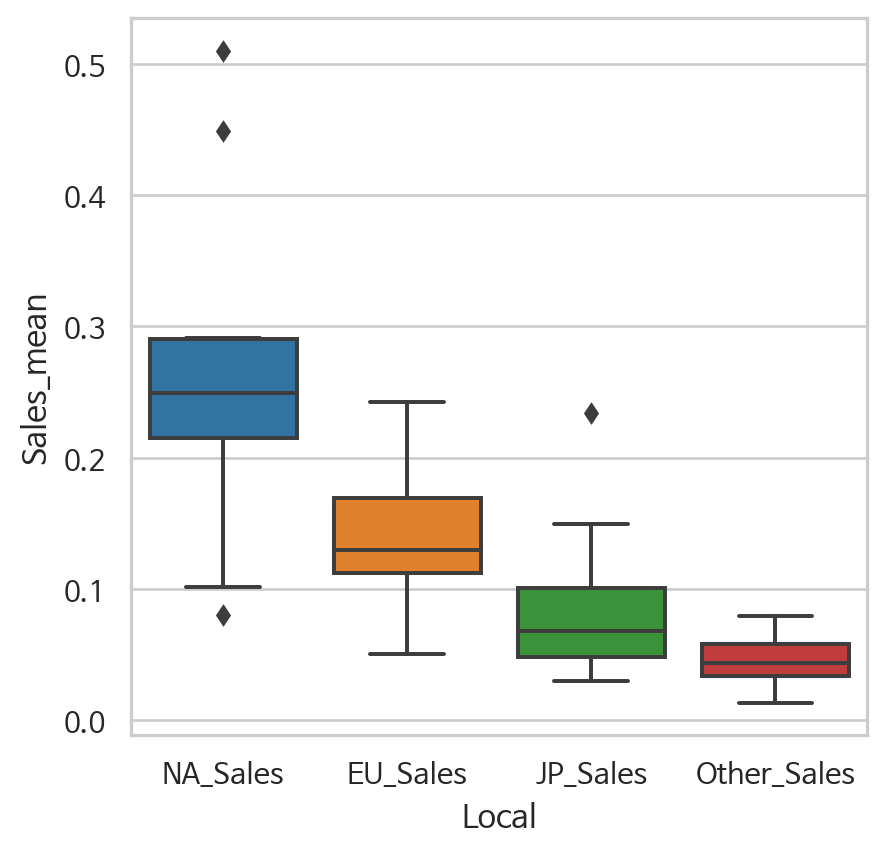

In [68]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5), dpi=95)
sns.boxplot(data = gl_mean_tidy, x = 'Local', y = 'Sales_mean');

In [69]:
# 이상치 파악 함수 지정
def outliers(data):
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  return np.where((data > upper_bound) | (data < lower_bound))

# NA_Sales 이상치
NA_outliers = outliers(gl_mean_table['NA_Sales'])[0]
print('NA_Sales 이상치:', NA_outliers)

# JP_Sales 이상치 
JP_outliers = outliers(gl_mean_table['JP_Sales'])[0]
print('JP_Sales 이상치:', JP_outliers)

NA_Sales 이상치: [1 4 8]
JP_Sales 이상치: [7]


In [70]:
# 이상치 제거

# 이상치를 결측값으로 처리
# NA_Sales 이상치
gl_mean_table.loc[1,'NA_Sales'] = np.nan
gl_mean_table.loc[4,'NA_Sales'] = np.nan
gl_mean_table.loc[8,'NA_Sales'] = np.nan

# JP_Sales 이상치 
gl_mean_table.loc[7,'JP_Sales'] = np.nan
gl_mean_table.loc[4,'JP_Sales'] = np.nan

# 결측값으로 처리한 이상치를 0으로 변경 
gl_mean_table = gl_mean_table.fillna(0) 

In [71]:
# 이상치 변경 확인
print(gl_mean_table.loc[1,'NA_Sales']) 
print(gl_mean_table.loc[4,'NA_Sales']) 
print(gl_mean_table.loc[8,'NA_Sales']) 

print(gl_mean_table.loc[7,'JP_Sales'])
print(gl_mean_table.loc[4,'JP_Sales'])

0.0
0.0
0.0
0.0
0.0


In [72]:
# tidy 데이터 재로드
gl_mean_tidy = pd.melt(gl_mean_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                      var_name='Local', value_name='Sales_mean')

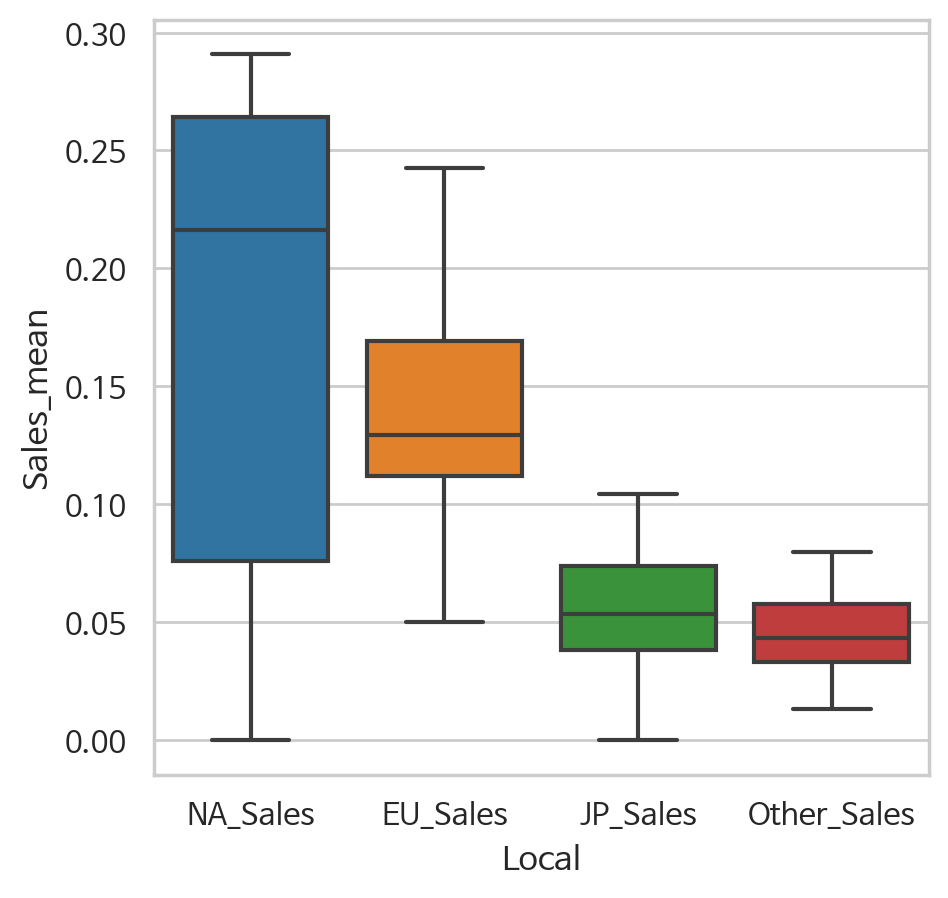

In [73]:
# 이상치 제거 확인
plt.figure(figsize=(5, 5), dpi=100)
sns.boxplot(data = gl_mean_tidy, x = 'Local', y = 'Sales_mean');

In [74]:
# ANOVA Test 수행
import statsmodels.api as sm 
from statsmodels.formula.api import ols

pd.options.display.float_format = '{:.10f}'.format # 지수 표현 없이 소수점으로 표현

model = ols('Sales_mean ~ C(Local)', data=gl_mean_tidy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 

,sum_sq,df,F,PR(>F)
C(Local),0.1500037612,3.0000000000,10.7731444907,0.0000197105
Residual,0.2042166209,44.0000000000,nan,nan


ANOVA Test 결과, <br>
P-value 값이 유의수준인 0.05보다 작으므로, 
'지역에 따라 선호하는 게임 장르가 다르지 않다'는 귀무가설을 기각한다.

#### 즉, **지역에 따라 선호하는 게임 장르가 다르다.**

##### 2) 지역별 선호하는 게임 장르 

In [ ]:
# 그래프 한글 깨짐 대처
# 이 셀을 실행한 후, 완료되면 [런타임 다시 시작]. 그후, 아래 셀부터 실행
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [75]:
pd.reset_option('display.float_format') # float format 원래대로 복구

# 'Genre'로 Sales 데이터 그룹화
gl = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
gl_sum_grouped = gl.groupby(['Genre']).sum() 
gl_sum_table = gl_sum_grouped.reset_index()
gl_sum_table 

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


In [76]:
# tidy 형태로 만들기
gl_sum_tidy = pd.melt(gl_sum_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                      var_name='Local', value_name='Sales')
gl_sum_tidy.head(15)

,Genre,Local,Sales
0,Action,NA_Sales,858.75
1,Adventure,NA_Sales,101.79
2,Fighting,NA_Sales,220.35
3,Misc,NA_Sales,394.73
4,Platform,NA_Sales,445.38
5,Puzzle,NA_Sales,121.58
6,Racing,NA_Sales,354.70
7,Role-Playing,NA_Sales,318.76
8,Shooter,NA_Sales,574.48
9,Simulation,NA_Sales,181.43


In [23]:
# 이미지 파일 저장 경로 지정
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI 부트캠프 9기 _ CodeStates/Section 01/Project_Section 01')

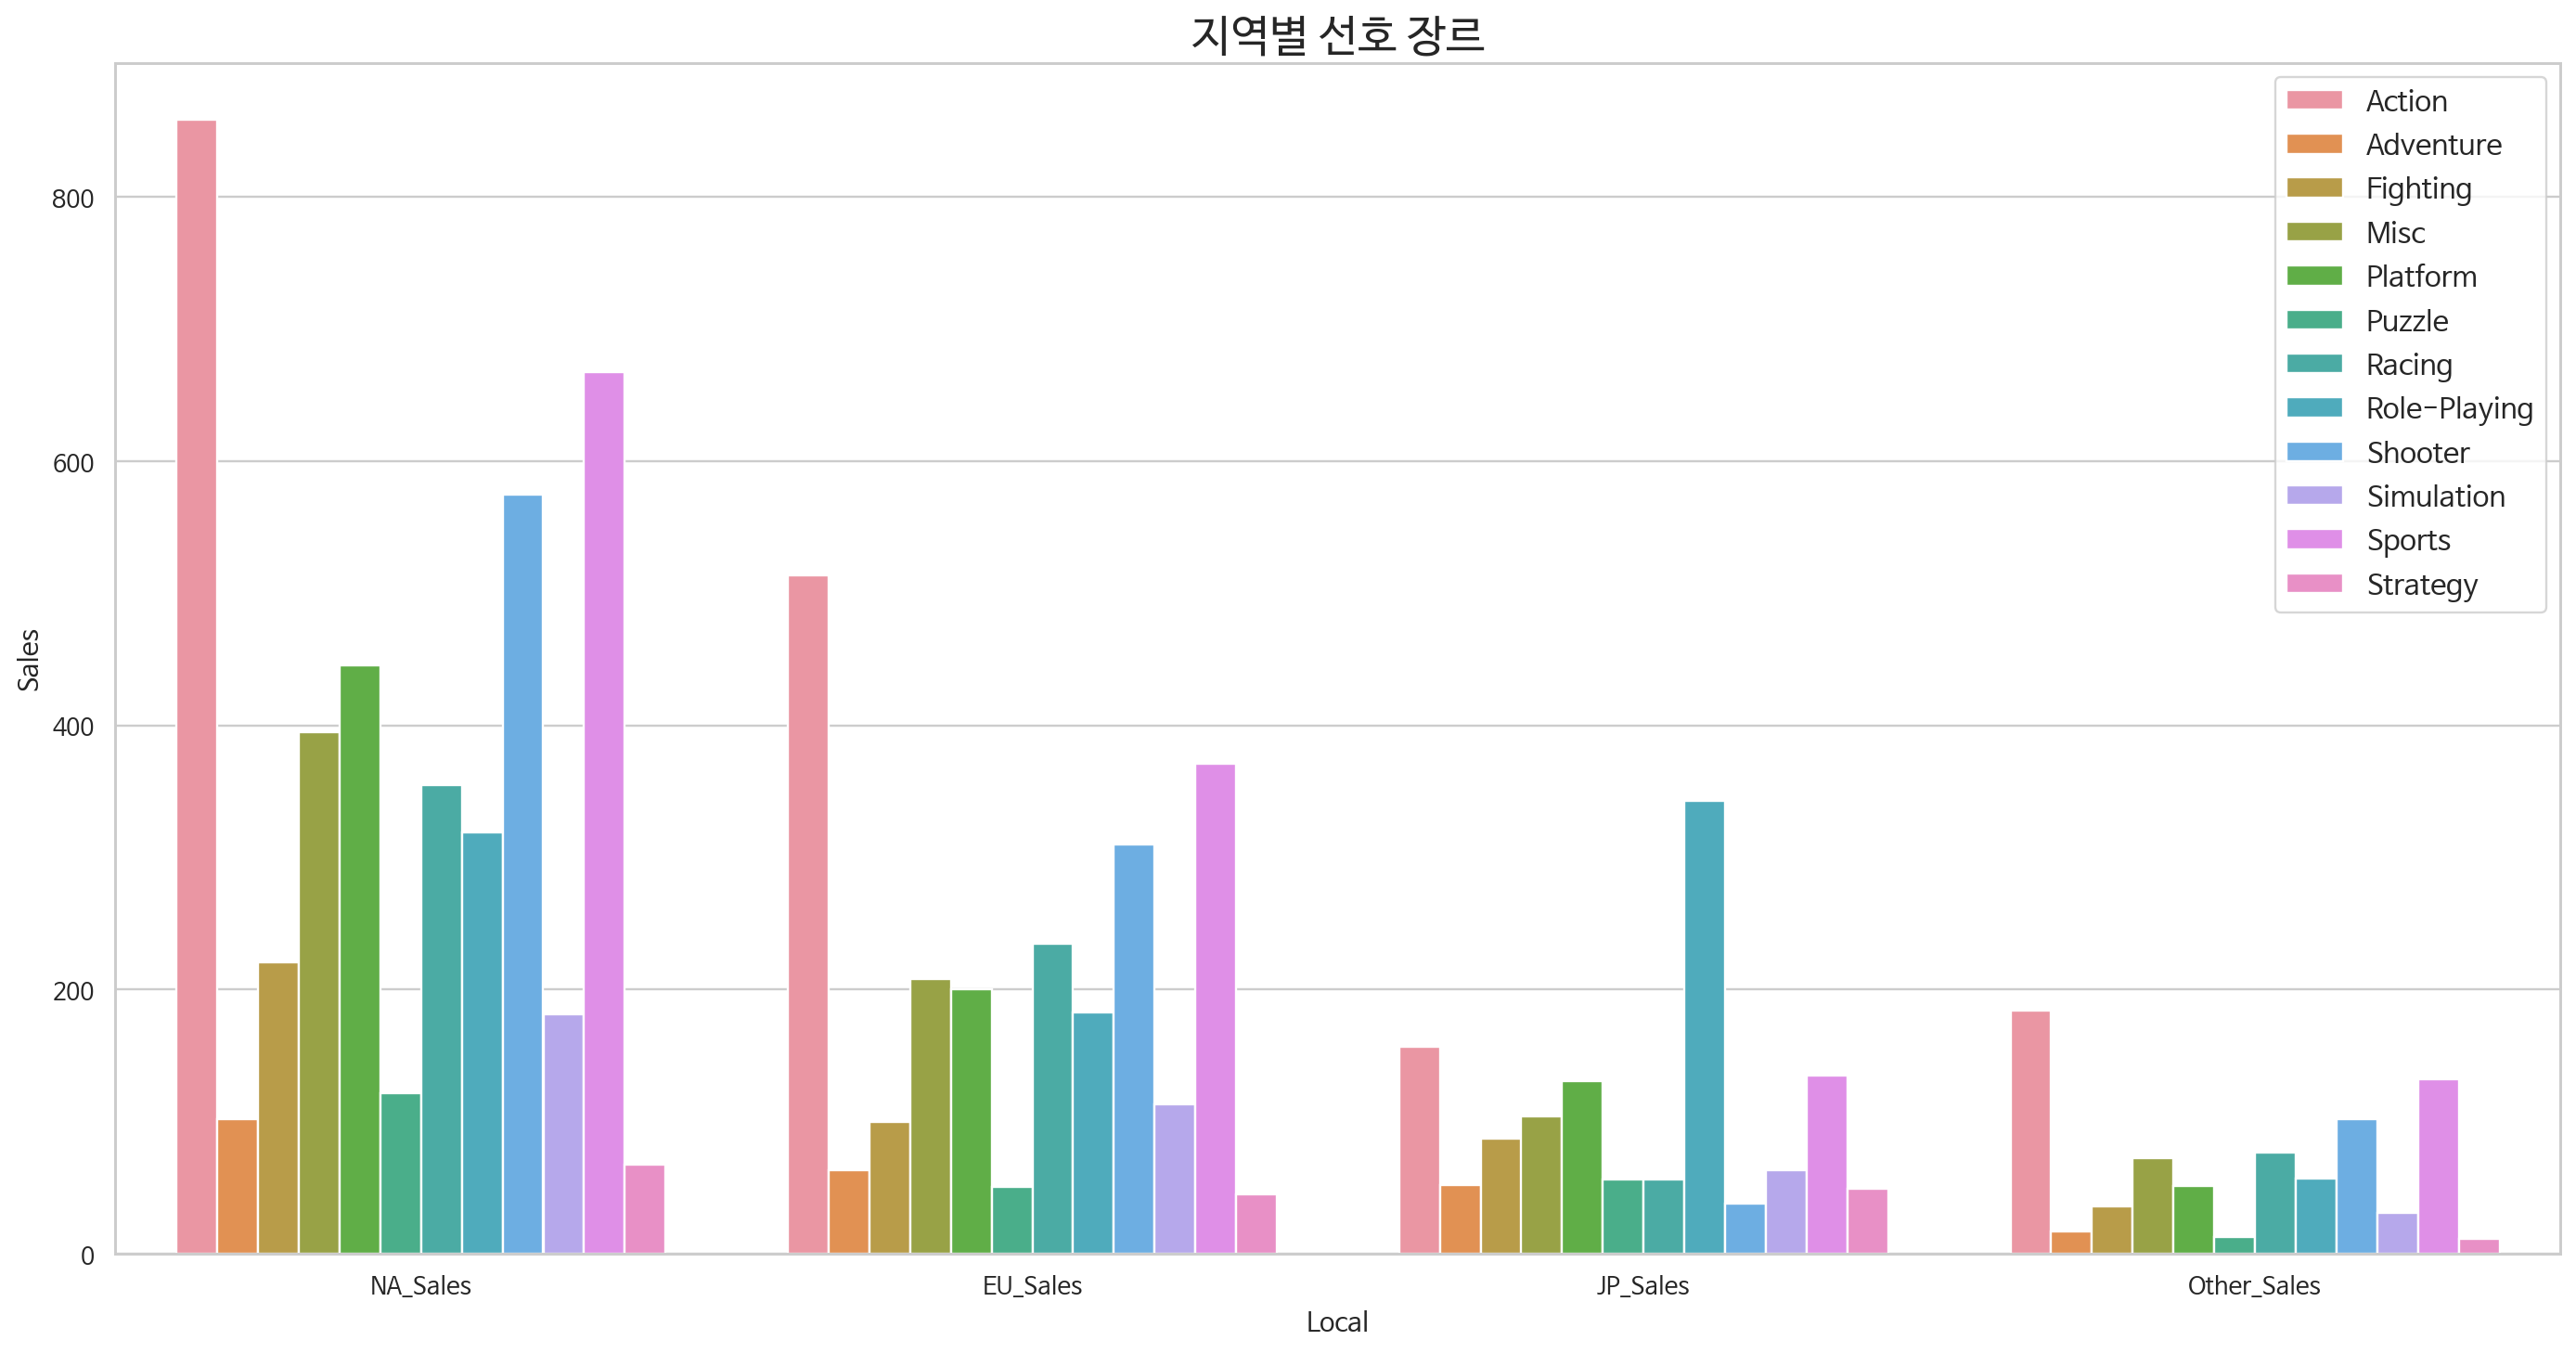

In [77]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 한글 깨짐 방지
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

# barplot 
plt.figure(figsize=(20, 10), dpi=85) # dpi: 해상도
sns.barplot(data=gl_sum_tidy, x='Local', y='Sales', hue='Genre')
plt.title('지역별 선호 장르', loc='center', fontsize=20)
plt.legend(fontsize=13)

plt.savefig('지역별 선호 장르.png')

plt.show() 

**일본** 지역(JP)에서는 **Role-Playing** 장르, <br>
**나머지** 북미 지역(NA), 유럽 지역(EU)과 기타 지역(Other)에서는 **Action** 장르를 선호한다. 

### 2. 연도별 게임의 트렌드가 있을까 

##### 1) 연도에 따른 장르별 출시량

In [78]:
# 연도별 최고 출시량을 기록한 장르 데이터프레임 만들기

# 연도에 따른 장르별 개수
yg = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

# 개수가 가장 많은 장르만 뽑기
yg_max = yg.groupby(['Year'])['Count'].transform(max) == yg['Count']
y_max_g = yg[yg_max].reset_index(drop=True)
y_max_g.head()

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3


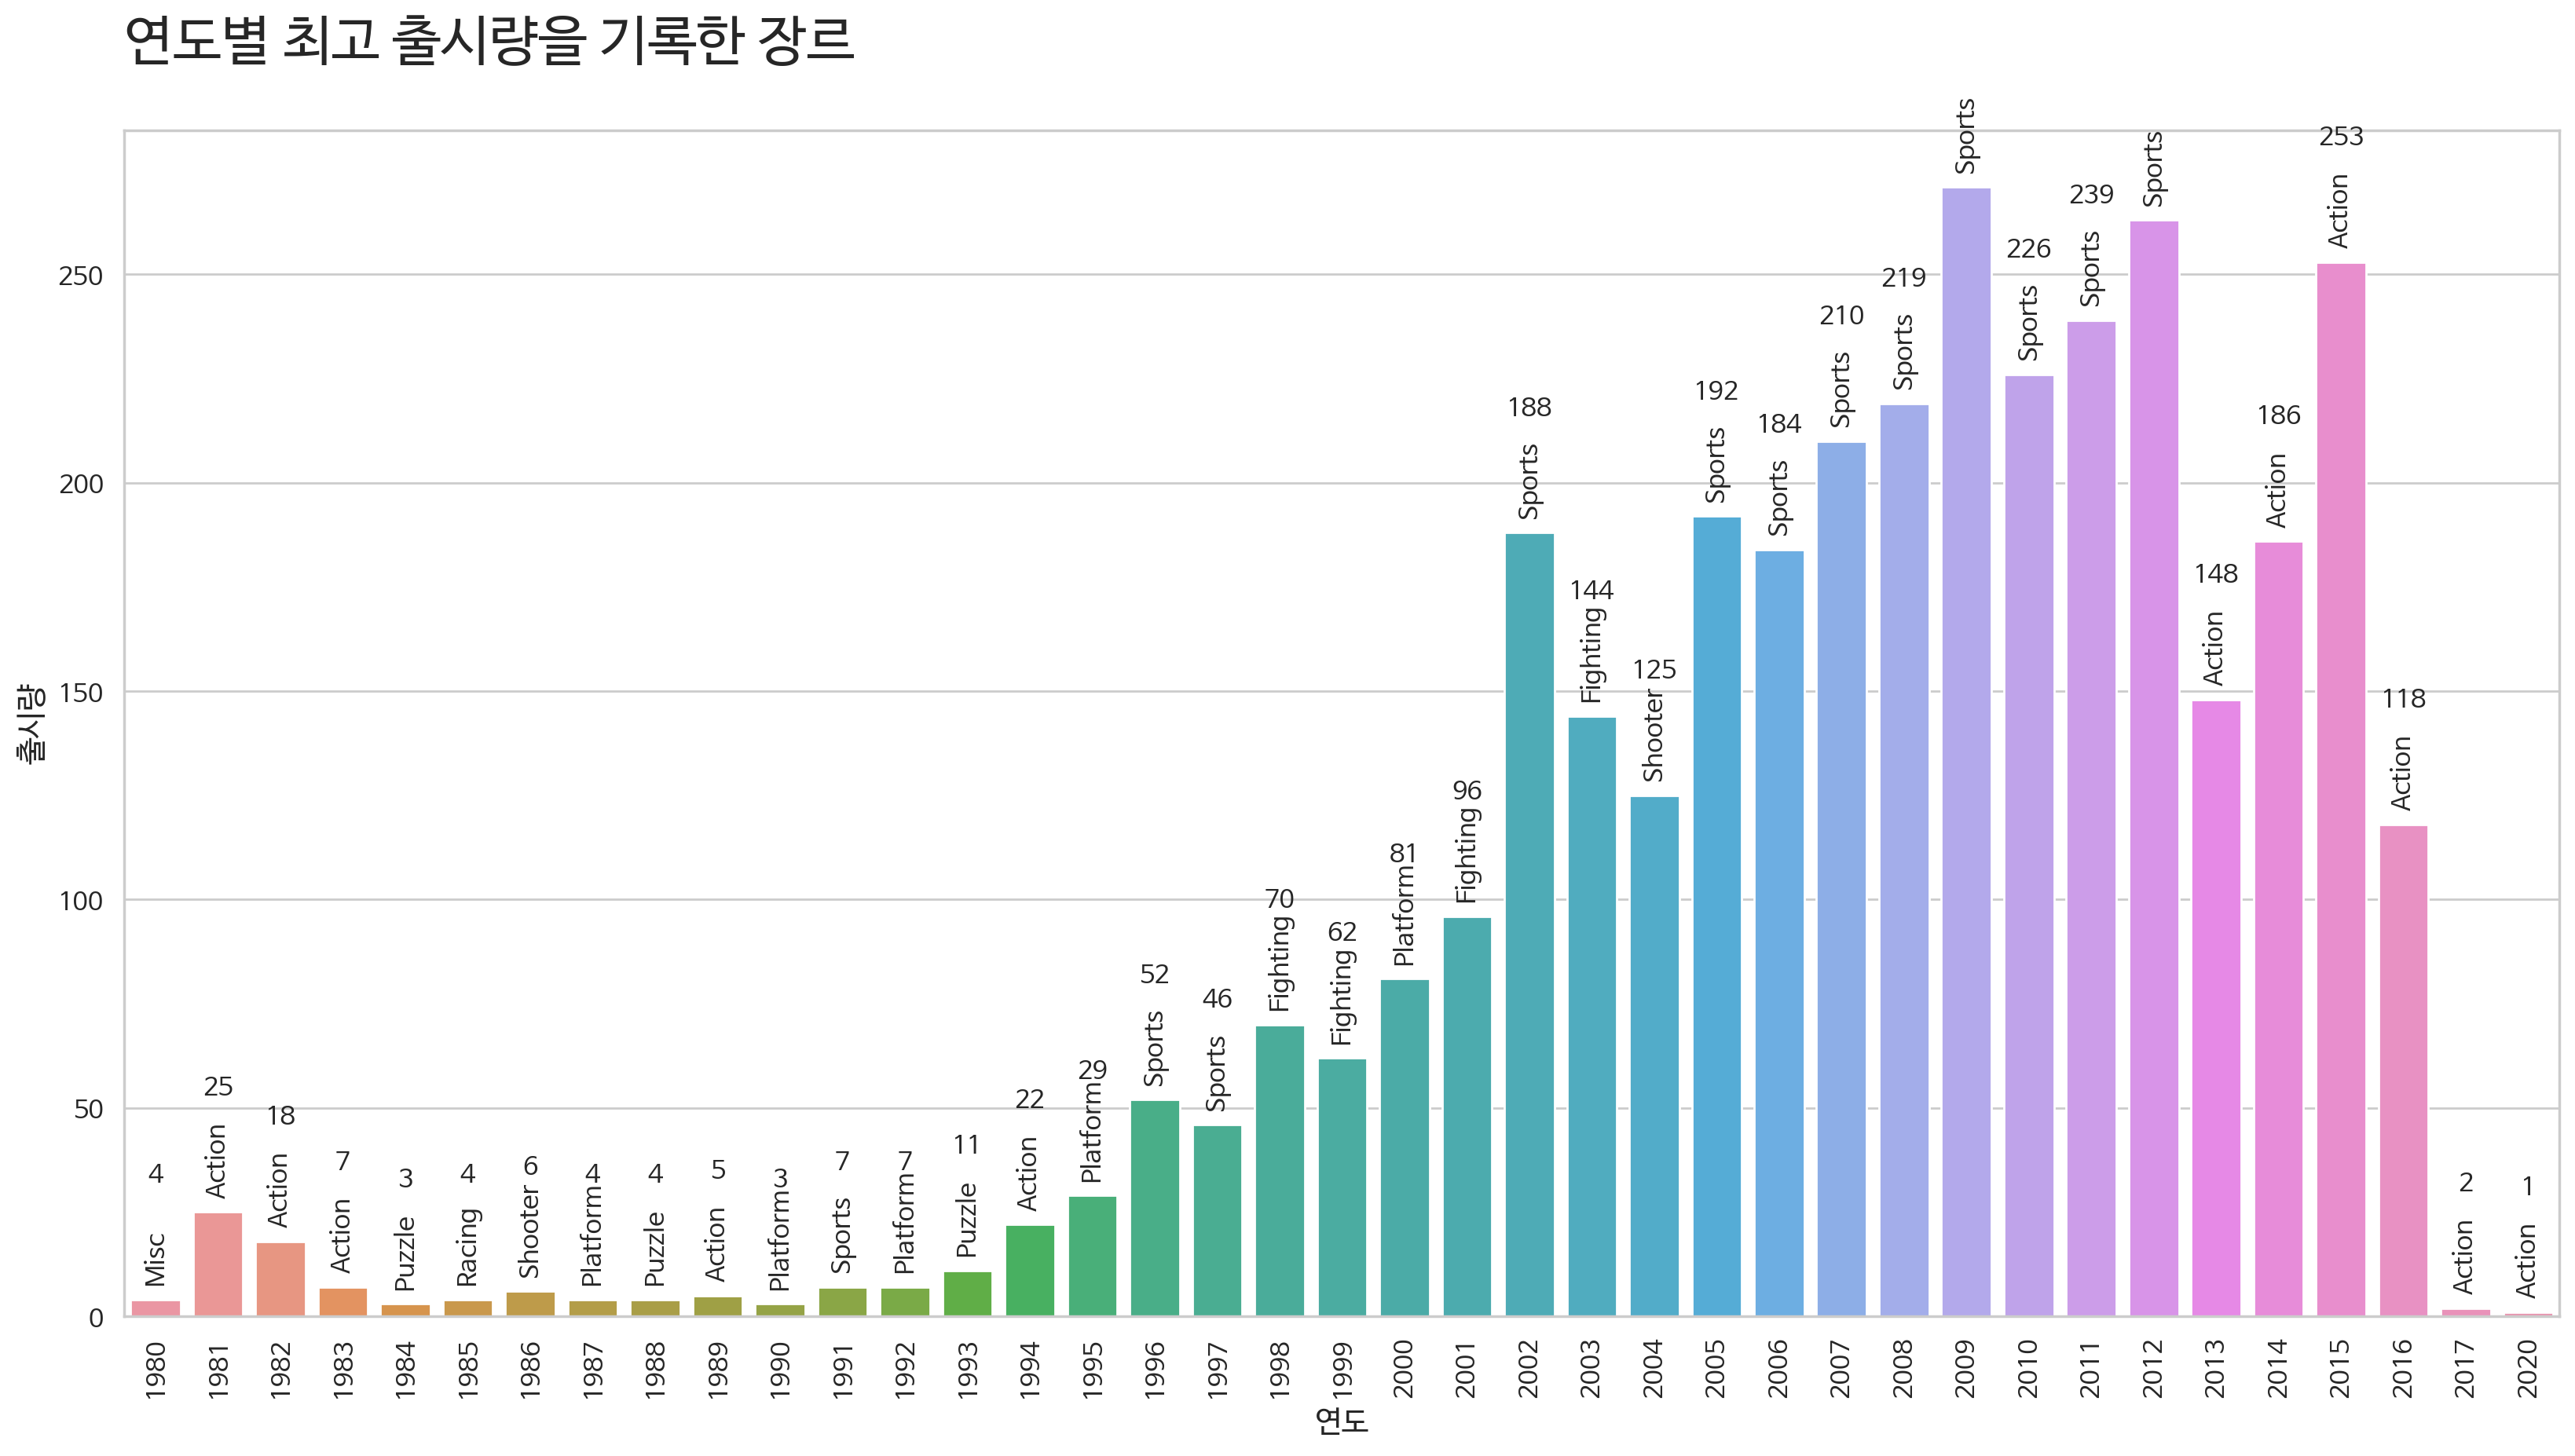

In [79]:
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(20,10), dpi=100)
ax = sns.barplot(x='Year', y='Count', data=y_max_g)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+25), 
                   ha = 'center', va = 'center',
                   xytext = (0, 9), 
                   textcoords = 'offset points')

genre = y_max_g['Genre'].values 
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 5,
            genre[i], rotation=90, ha="center")
    i += 1


plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('연도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('연도별 최고 출시량을 기록한 장르', fontsize=25, y=1.05, loc='left')

plt.savefig('연도별 최고 출시량을 기록한 장르.png')

plt.show()

##### 2) 연도에 따른 장르별 출고량

In [80]:
# 연도별 최고 출고량을 기록한 장르 데이터프레임 만들기
yg_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

condition = yg_sales['Global_Sales'] == yg_sales.groupby(['Year'])['Global_Sales'].transform(max)
y_max_sales_g = yg_sales[condition]

y_max_sales_g.head()

,Year,Genre,Global_Sales
3,1980,Shooter,7.07
4,1981,Action,14.79
14,1982,Puzzle,10.04
21,1983,Platform,6.93
30,1984,Shooter,31.10


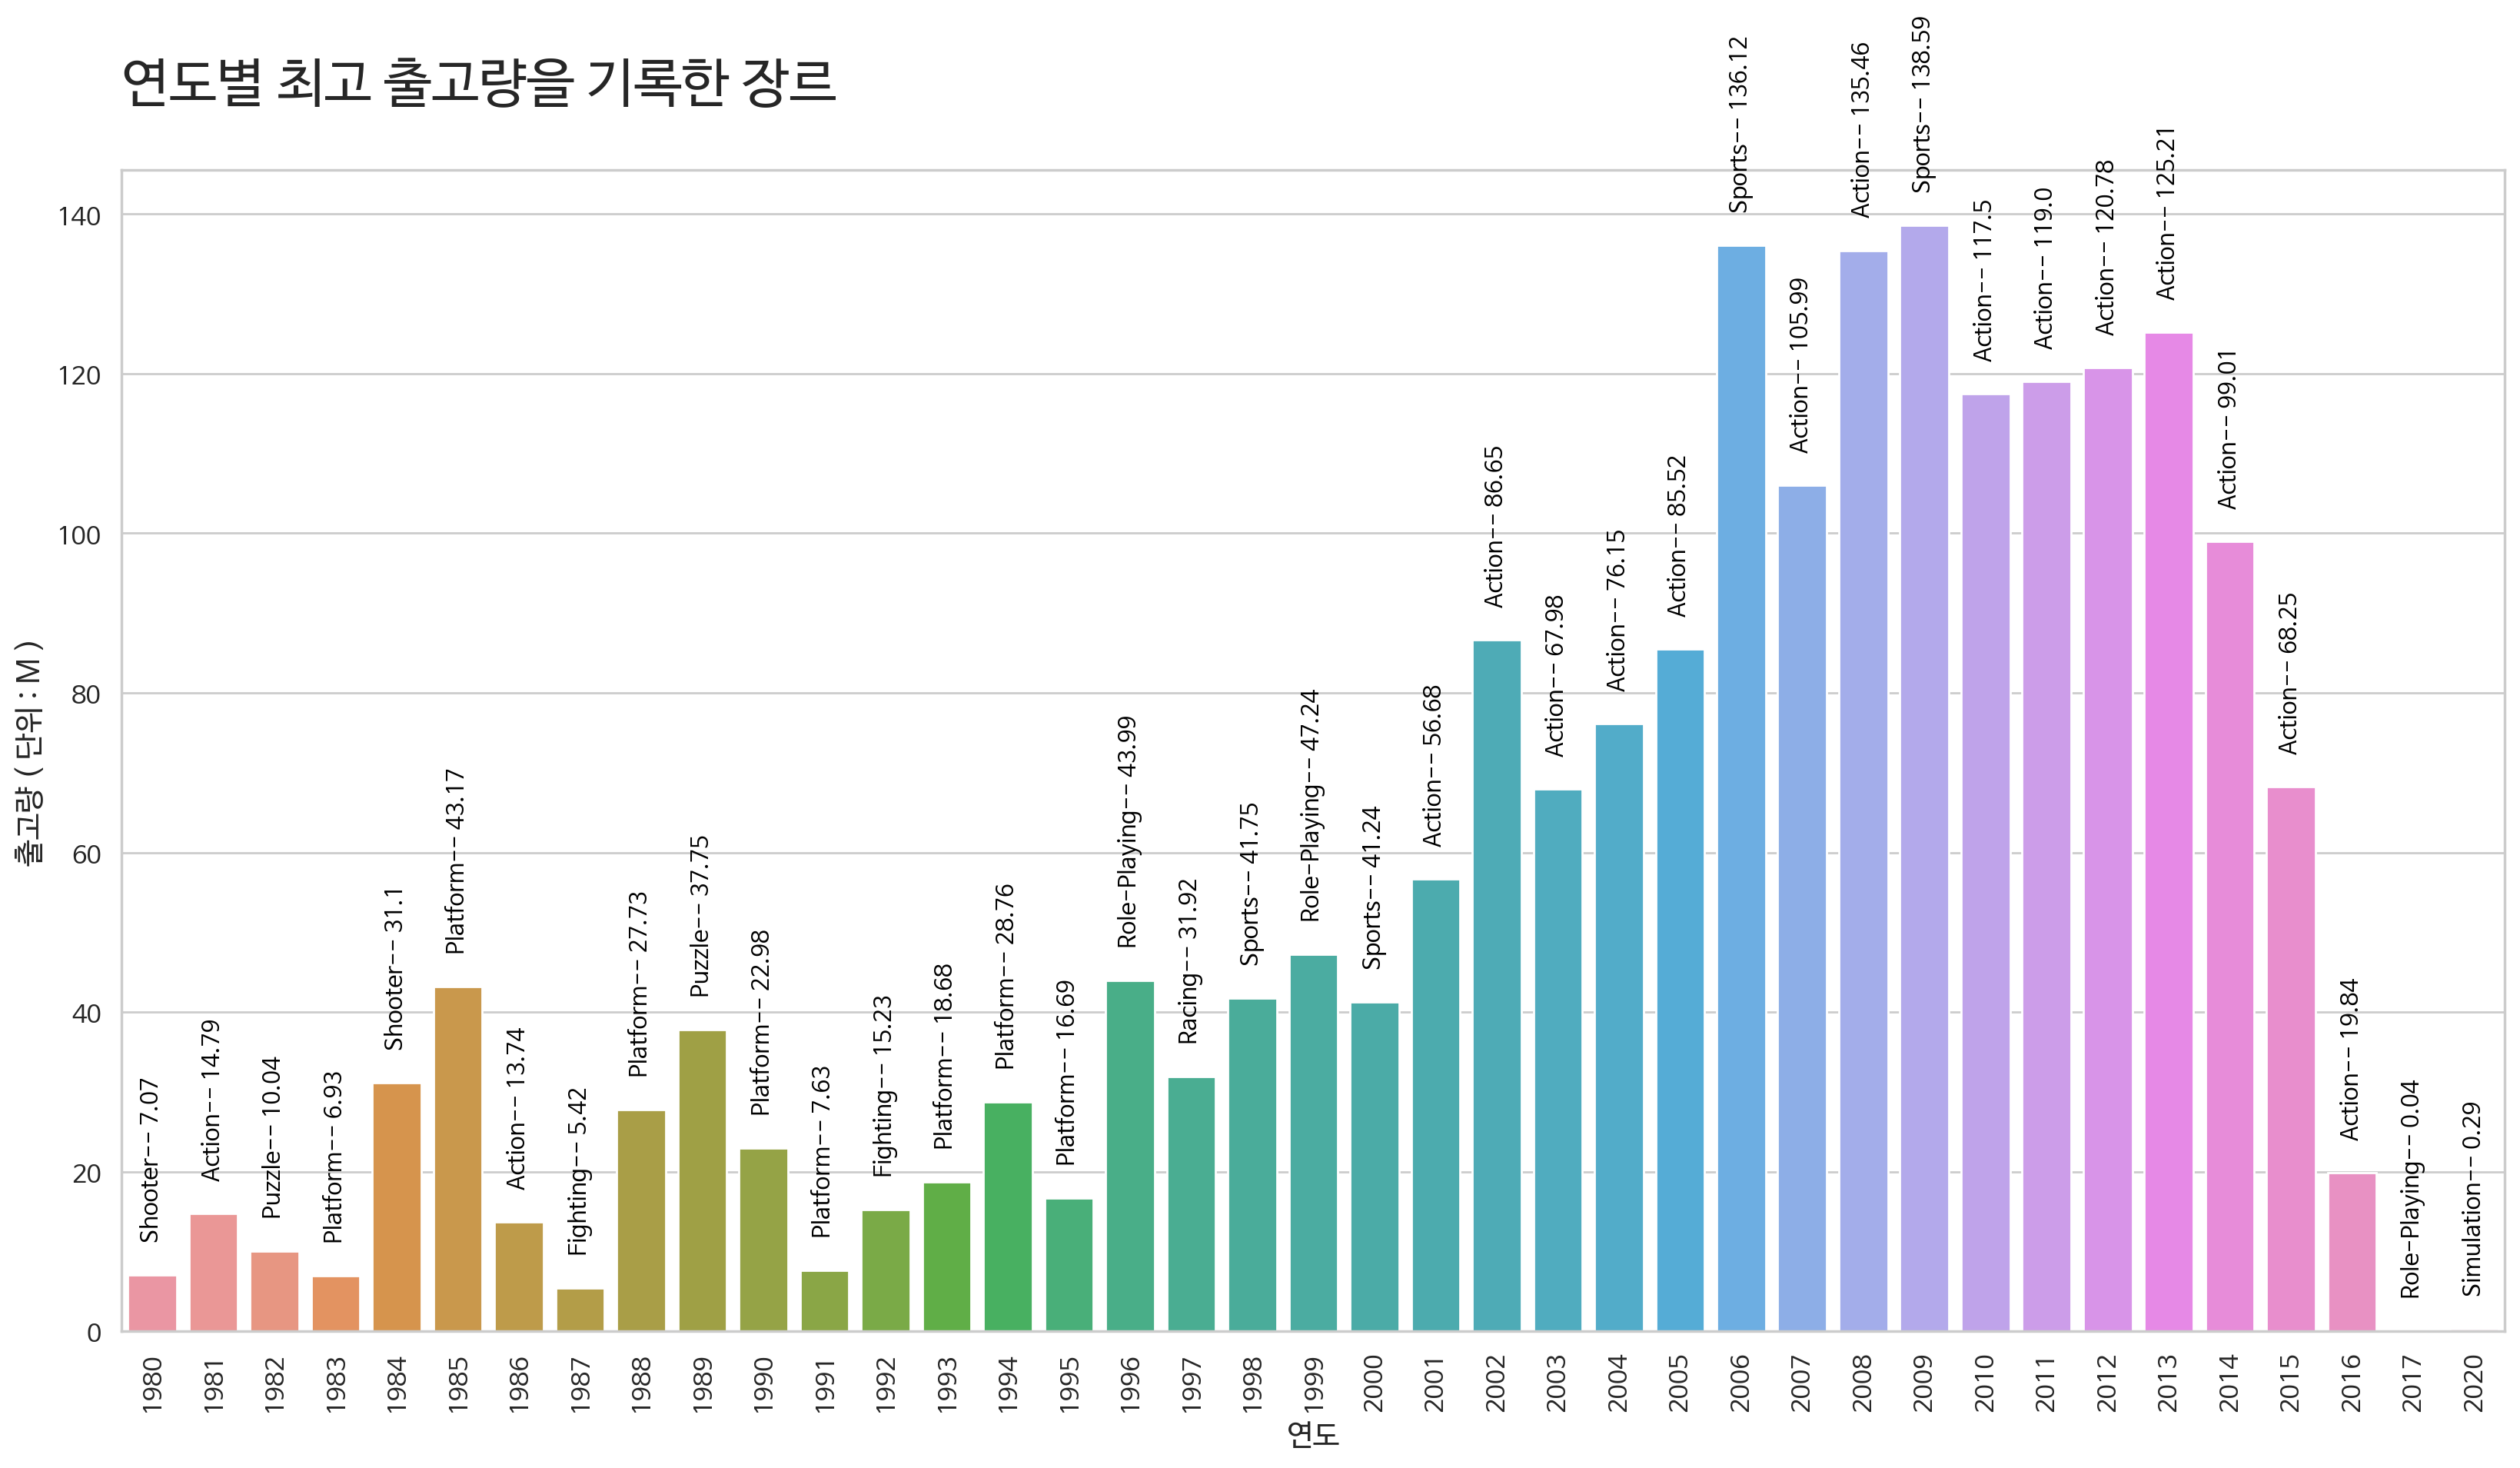

In [81]:
# 시각화
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(20,10), dpi=100)
ax = sns.barplot(x='Year', y='Global_Sales', data=y_max_sales_g)

genre = y_max_sales_g['Genre'].values
idx = 0
for value in y_max_sales_g['Global_Sales']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '--' + ' ' + str(round(value, 2))),
            color='black', size=11, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('연도', fontsize=14)
plt.ylabel('출고량 ( 단위 : M )', fontsize=14)
ax.set_title('연도별 최고 출고량을 기록한 장르', fontsize=25, y=1.05, loc='left')

plt.savefig('연도별 최고 출고량을 기록한 장르.png')

plt.show()

2000년까지는 대체적으로 매년 수요가 다양했지만, 2001년 부터는 Action 장르의 수요가 가장 많았다. <br>
눈여겨 볼 점은, 2006년과 2009년에만 Action보다 Sport 장르의 수요가 더 많았던 것으로 나타났는데 <br> 
이는 2006년의 FIFA 월드컵과 2009년의 FIFA U-20 월드컵의 영향인 것으로 보인다.

##### 3) 연도에 따른 플랫폼별 출시량

In [83]:
# 연도별 최고 출시량을 기록한 플랫폼 데이터프레임 만들기

# 연도에 따른 플랫폼별 개수
yp = df.groupby(['Year', 'Platform']).size().reset_index(name='Count')

# 개수가 가장 많은 플랫폼만 뽑기
yp_max = yp.groupby(['Year'])['Count'].transform(max) == yp['Count']
y_max_p = yp[yp_max].reset_index(drop=True)
y_max_p.head()

,Year,Platform,Count
0,1980,2600,8
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1984,NES,13


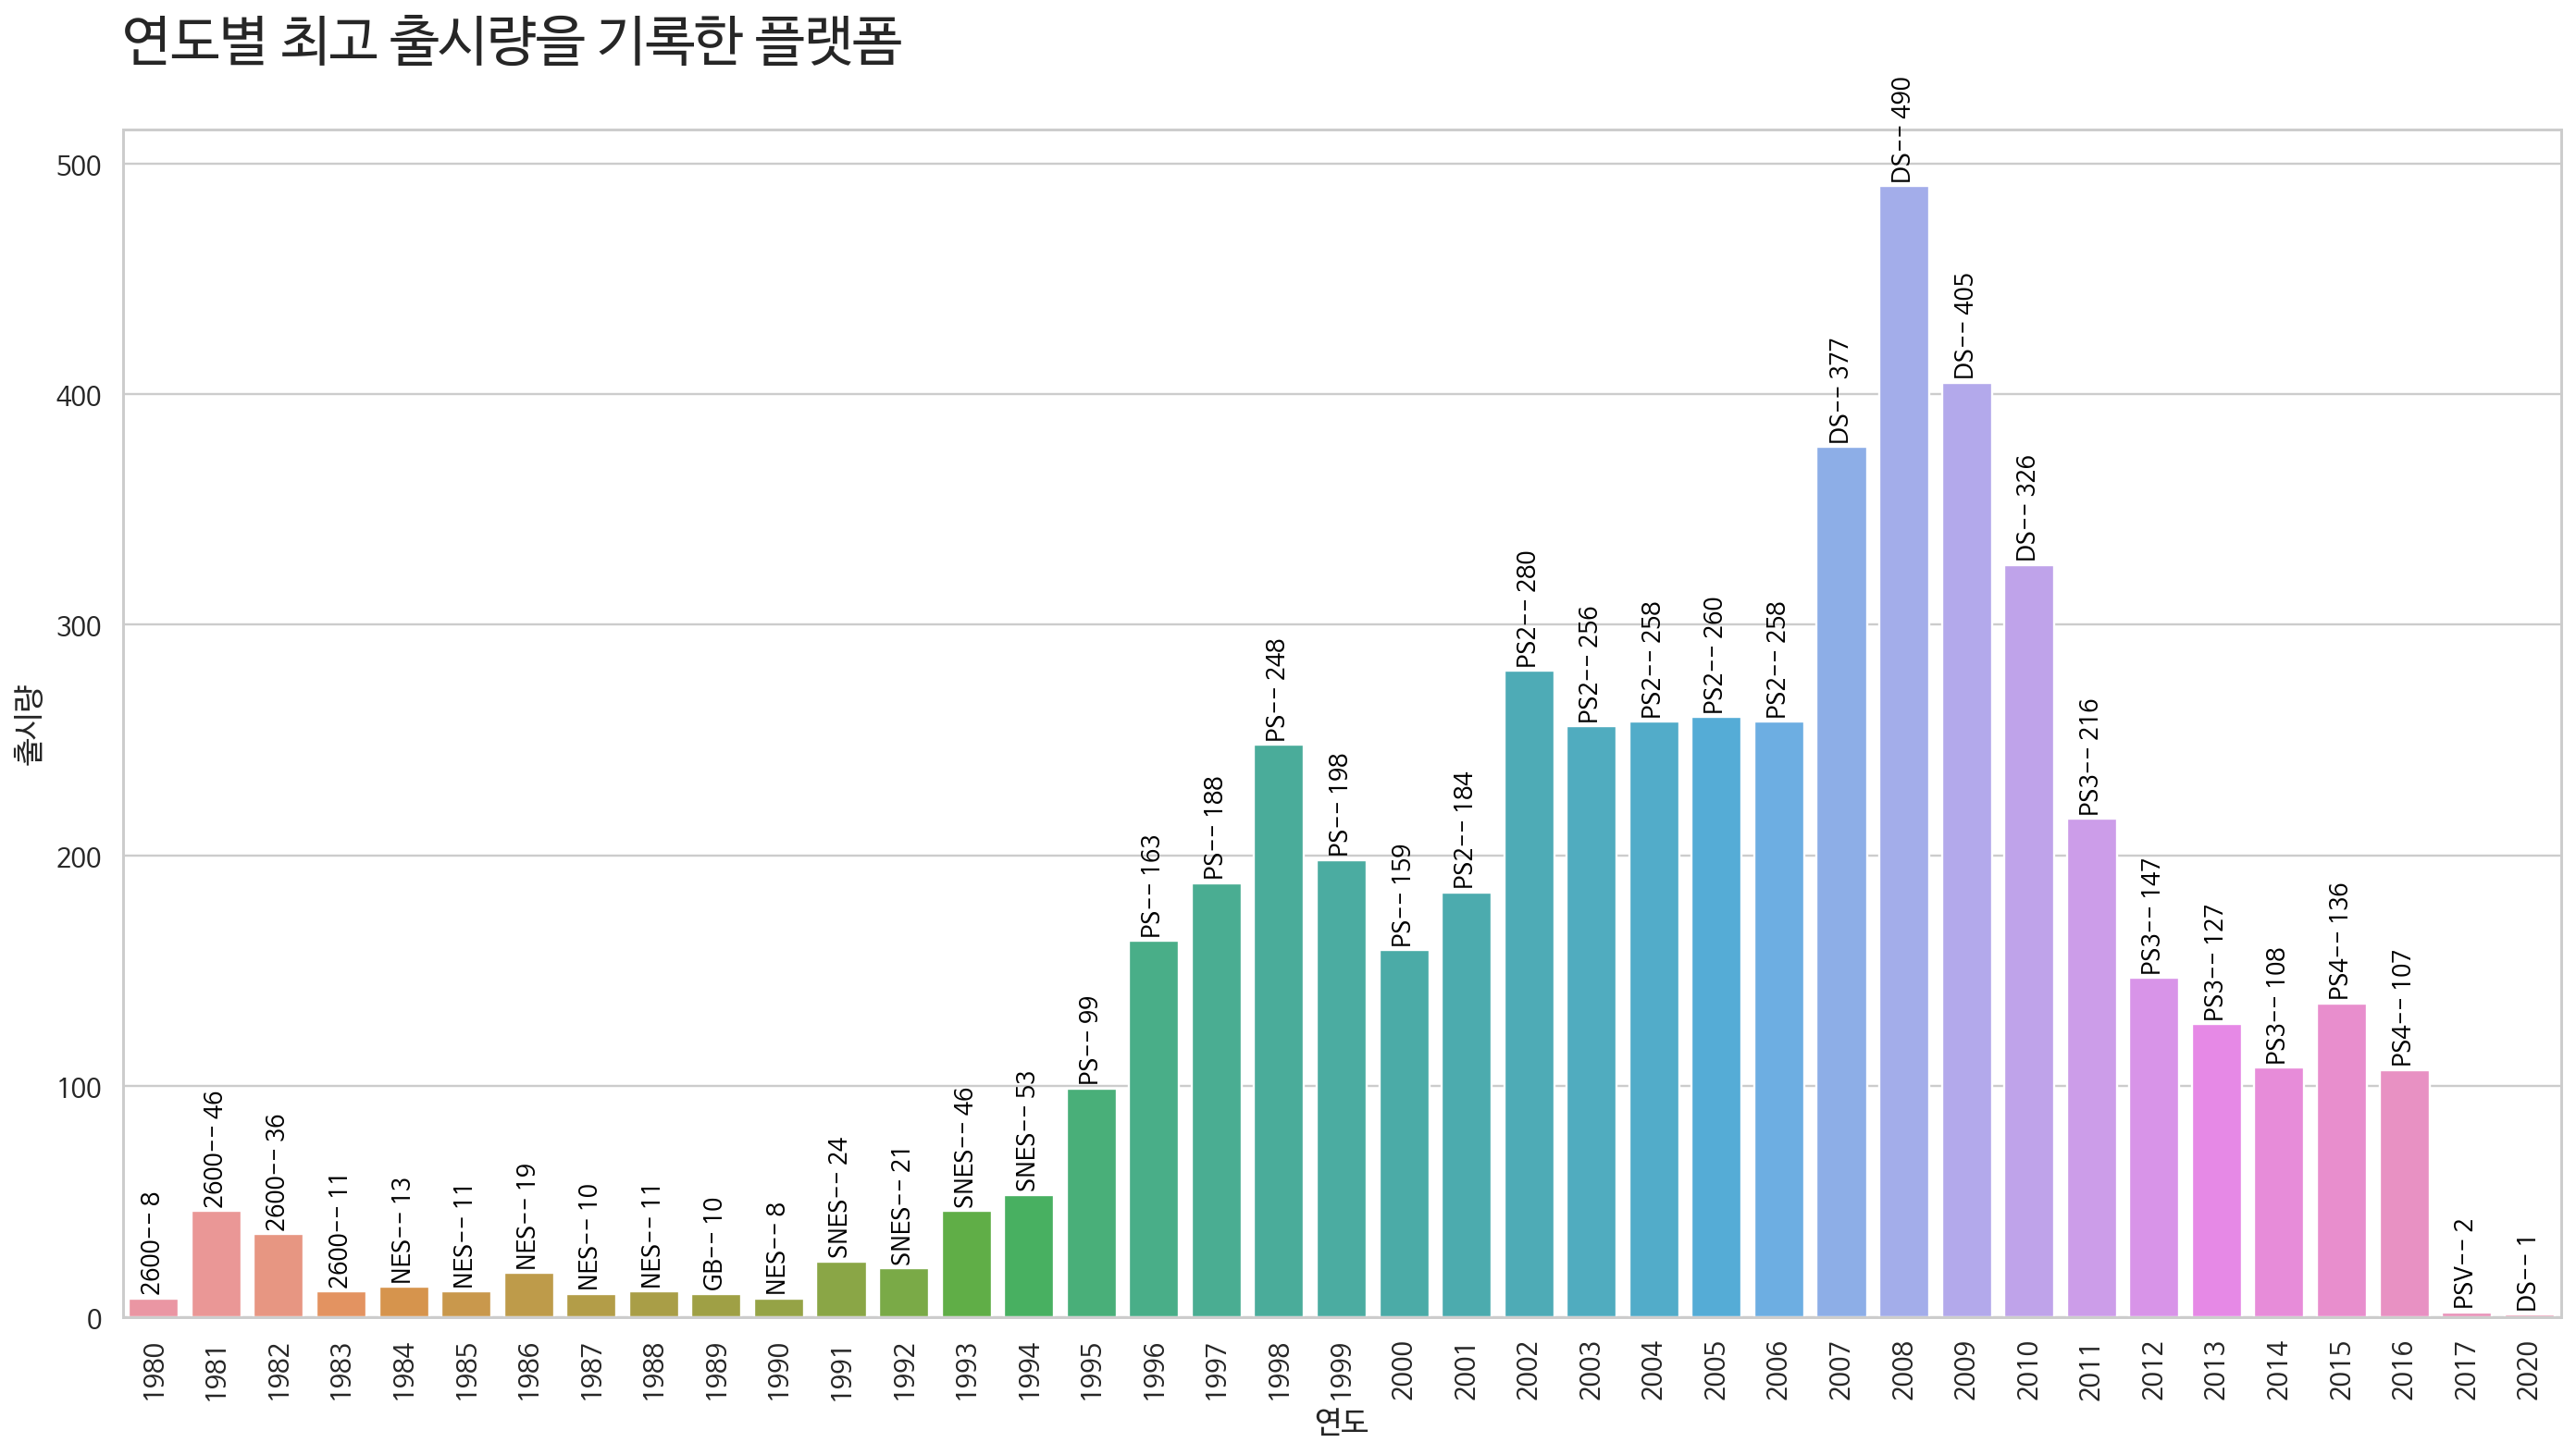

In [84]:
# 시각화
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(20,10), dpi=85)
ax = sns.barplot(x='Year', y='Count', data=y_max_p)

platform = y_max_p['Platform'].values
idx = 0
for value in y_max_p['Count']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + '--' + ' ' + str(value)),
            color='black', size=11, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('연도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('연도별 최고 출시량을 기록한 플랫폼', fontsize=25, y=1.05, loc='left')

plt.savefig('연도별 최고 출시량을 기록한 플랫폼.png')

plt.show()

##### 4) 연도에 따른 플랫폼별 출고량

In [85]:
# 연도별 최고 출고량을 기록한 플랫폼 데이터프레임 만들기
yp_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

condition = yp_sales['Global_Sales'] == yp_sales.groupby(['Year'])['Global_Sales'].transform(max)
y_max_sales_p = yp_sales[condition]

y_max_sales_p.head() 

,Year,Platform,Global_Sales
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
4,1983,NES,10.96
6,1984,NES,50.08


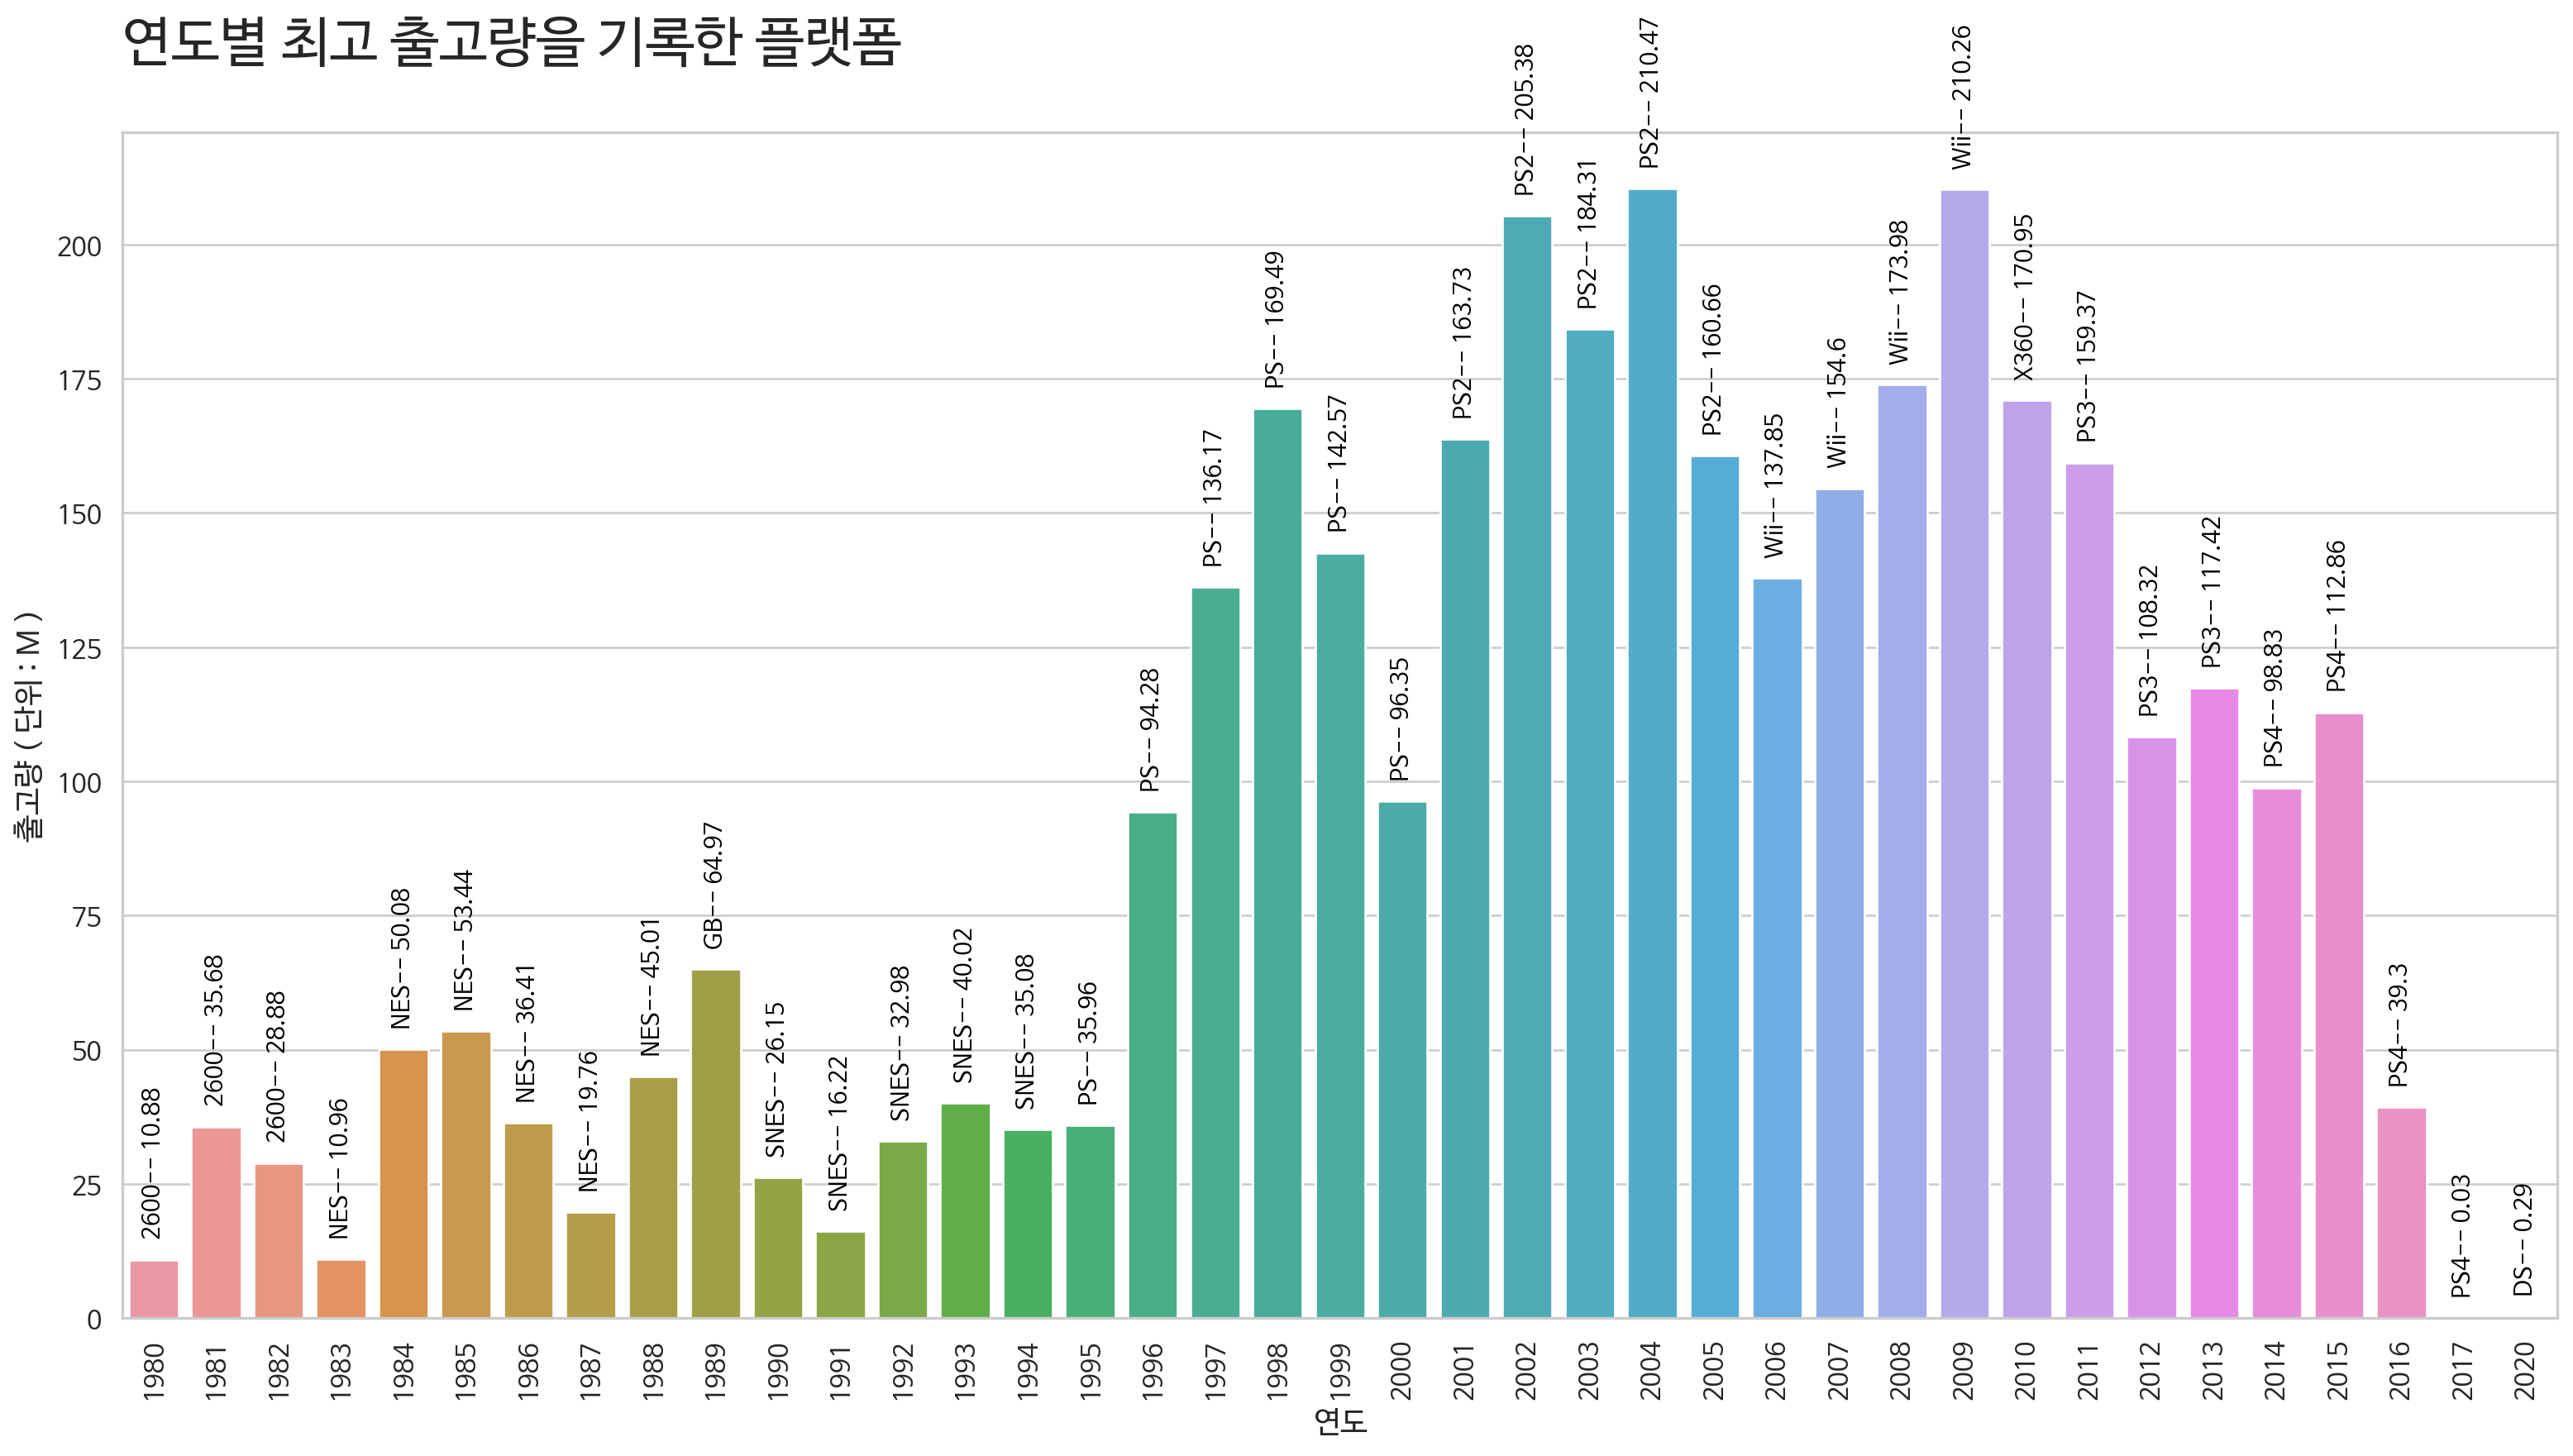

In [86]:
# 시각화
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(20,10), dpi=95)
ax = sns.barplot(x='Year', y='Global_Sales', data=y_max_sales_p)

platform = y_max_sales_p['Platform'].values
idx = 0
for value in y_max_sales_p['Global_Sales']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + '--' + ' ' + str(round(value, 2))),
            color='black', size=11, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('연도', fontsize=14)
plt.ylabel('출고량 ( 단위 : M )', fontsize=14)
ax.set_title('연도별 최고 출고량을 기록한 플랫폼', fontsize=25, y=1.05, loc='left')

plt.savefig('연도별 최고 출고량을 기록한 플랫폼.png')

plt.show()

### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

##### 1) 출고량이 Top 20인 게임 분석

In [87]:
# 'Global_Sales'기준으로 출고량 높은 게임 20개 추출 
top_20 = df.sort_values(by=['Global_Sales'], ascending=False).head(20)
top_20 = top_20[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Global_Sales']]
top_20 = top_20.sort_values(by=['Global_Sales'], ascending=False)
# 'Rank' column 생성 및 인덱스로 설정
rank = [str(x)+' 위' for x in range(1, 21)]
top_20['Rank'] = rank
top_20 = top_20.set_index('Rank')
top_20 

,Name,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,,
1 위,Wii Sports,Wii,2006,Sports,Nintendo,82.74
2 위,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
3 위,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
4 위,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
5 위,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
6 위,Tetris,GB,1989,Puzzle,Nintendo,30.26
7 위,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
8 위,Wii Play,Wii,2006,Misc,Nintendo,29.01
9 위,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61


##### 2) 출고량이 Top 20인 게임의 장르 분석

In [88]:
# Top 20 게임의 장르별 개수
top_genre = top_20.groupby(['Genre']).size().reset_index(name='Count')
top_genre = top_genre.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
top_genre 

,Genre,Count
0,Platform,4
1,Sports,4
2,Misc,3
3,Action,2
4,Racing,2
5,Role-Playing,2
6,Puzzle,1
7,Shooter,1
8,Simulation,1


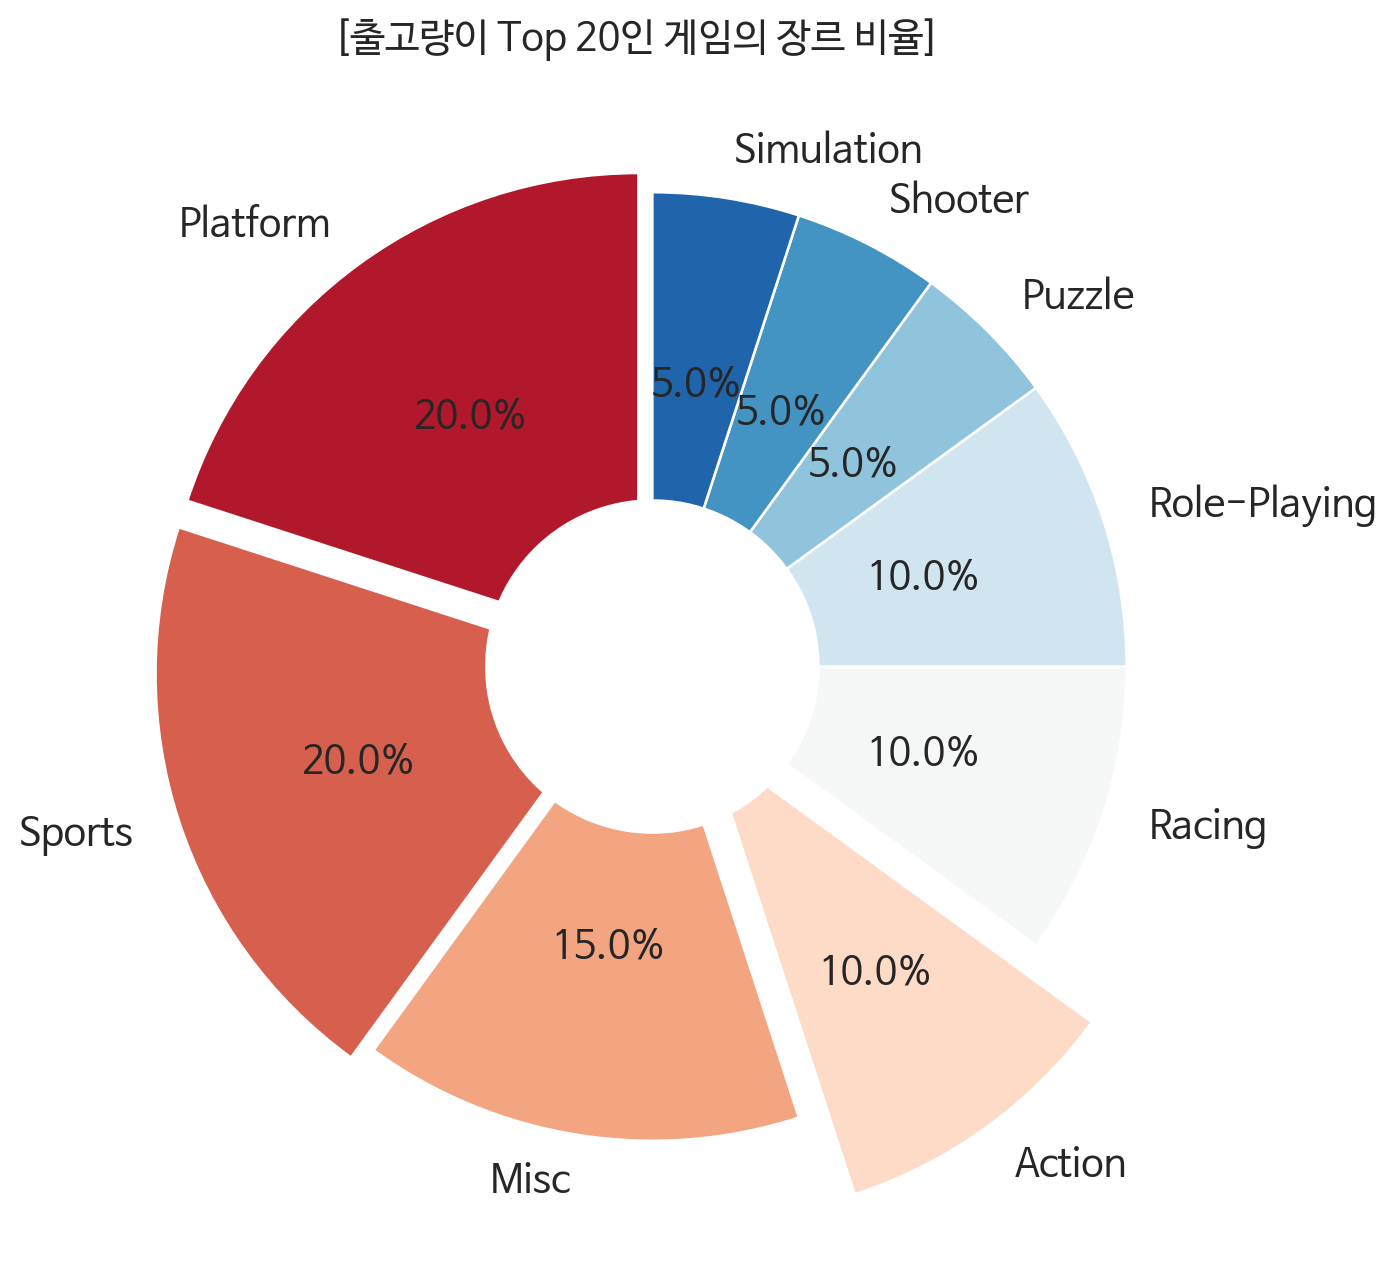

In [89]:
# 시각화
plt.figure(figsize=(8,8), dpi=93)

explode = [0.05, 0.05, 0.0, 0.20, 0.0, 0.0, 0.0, 0.0, 0.0]

plt.pie(top_genre['Count'].values,
        labels=top_genre['Genre'],
        autopct='%.1f%%', # 표시될 숫자 형식: 소수점 한자리까지
        startangle=90,
        textprops={'fontsize':15},
        colors=sns.color_palette("RdBu", 9),
        explode=explode)

center_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.title('[출고량이 Top 20인 게임의 장르 비율]', fontsize=15, y=1.05, loc='center')

plt.savefig('출고량이 Top 20인 게임의 장르 비율.png')

plt.show()

연도별 장르의 최고 출시량과 최고 출고량을 봤을 때는 Action 장르가 가장 많았는데 <br>
출고량 Top 20 게임에서는 Action 장르가 3위로 나타났다. (공동 1위: Platform, Sports) <br>

왜 이러한 결과가 나타났는지 알아보기 위해 Action 장르의 게임에 대한 분석을 진행한다. 

##### 3) Action 장르의 게임 분석 

In [90]:
# 'Genre'가 Action인 게임 추출 
action_game = df[df['Genre'] == 'Action']

# Action 장르 중 출고량 Top 20인 게임
action_sales = action_game.groupby(['Name'])['Global_Sales'].sum().reset_index()
action_top = action_sales.sort_values(by=['Global_Sales'], ascending=False).reset_index(drop=True)
action_top_20 = action_top.head(20)
# 'Rank' column 생성 및 인덱스로 설정
rank = [str(x)+' 위' for x in range(1, 21)]
action_top_20['Rank'] = rank
action_top_20 = action_top_20.set_index('Rank')
action_top_20

,Name,Global_Sales
Rank,,
1 위,Grand Theft Auto V,55.92
2 위,Grand Theft Auto: San Andreas,23.86
3 위,Grand Theft Auto IV,21.61
4 위,Grand Theft Auto: Vice City,16.19
5 위,FIFA Soccer 13,16.15
6 위,LEGO Star Wars: The Complete Saga,15.73
7 위,Assassin's Creed IV: Black Flag,13.20
8 위,Grand Theft Auto III,13.11
9 위,Assassin's Creed III,13.10


In [91]:
# top_20의 게임('Name')과 action_top_20 비교

# top_20의 'Name' column 추출 
top20_game = top_20[['Name']]
top20_game = pd.DataFrame(top20_game)
top20_game.rename(columns={'Name':'Top_20'}, inplace=True)

# action_top_20의 'Name' column 추출 
action20_game = action_top_20[['Name']]
action20_game = pd.DataFrame(action20_game)
action20_game.rename(columns={'Name':'Action_20'}, inplace=True)

# top_20의 게임('Name')과 action_top_20 비교 데이터 생성
game_20 = pd.concat([top20_game, action20_game], axis=1)
game_20 

,Top_20,Action_20
Rank,,
1 위,Wii Sports,Grand Theft Auto V
2 위,Super Mario Bros.,Grand Theft Auto: San Andreas
3 위,Mario Kart Wii,Grand Theft Auto IV
4 위,Wii Sports Resort,Grand Theft Auto: Vice City
5 위,Pokemon Red/Pokemon Blue,FIFA Soccer 13
6 위,Tetris,LEGO Star Wars: The Complete Saga
7 위,New Super Mario Bros.,Assassin's Creed IV: Black Flag
8 위,Wii Play,Grand Theft Auto III
9 위,New Super Mario Bros. Wii,Assassin's Creed III


전체 출고량이 Top 20인 게임과 Action 장르에서 출고량이 Top 20인 게임을 비교해본 결과, <br> Action 장르에서 출고량이 Top 20인 게임에 GTA(Grand Theft Auto)가 많았는데 너무 많은 시리즈로 나누어져 있어 <br> 
전체 출고량 Top 20에서 Action 장르인 게임이 2개밖에 나타나지 않았다고 볼 수 있다. 

##### 4) 출고량이 Top 20인 게임의 플랫폼 분석

In [92]:
# Top 20 게임의 플랫폼별 개수
top_platform = top_20.groupby(['Platform']).size().reset_index(name='Count')
top_platform = top_platform.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
top_platform 

,Platform,Count
0,Wii,7
1,DS,4
2,GB,3
3,NES,2
4,PS2,1
5,PS3,1
6,SNES,1
7,X360,1


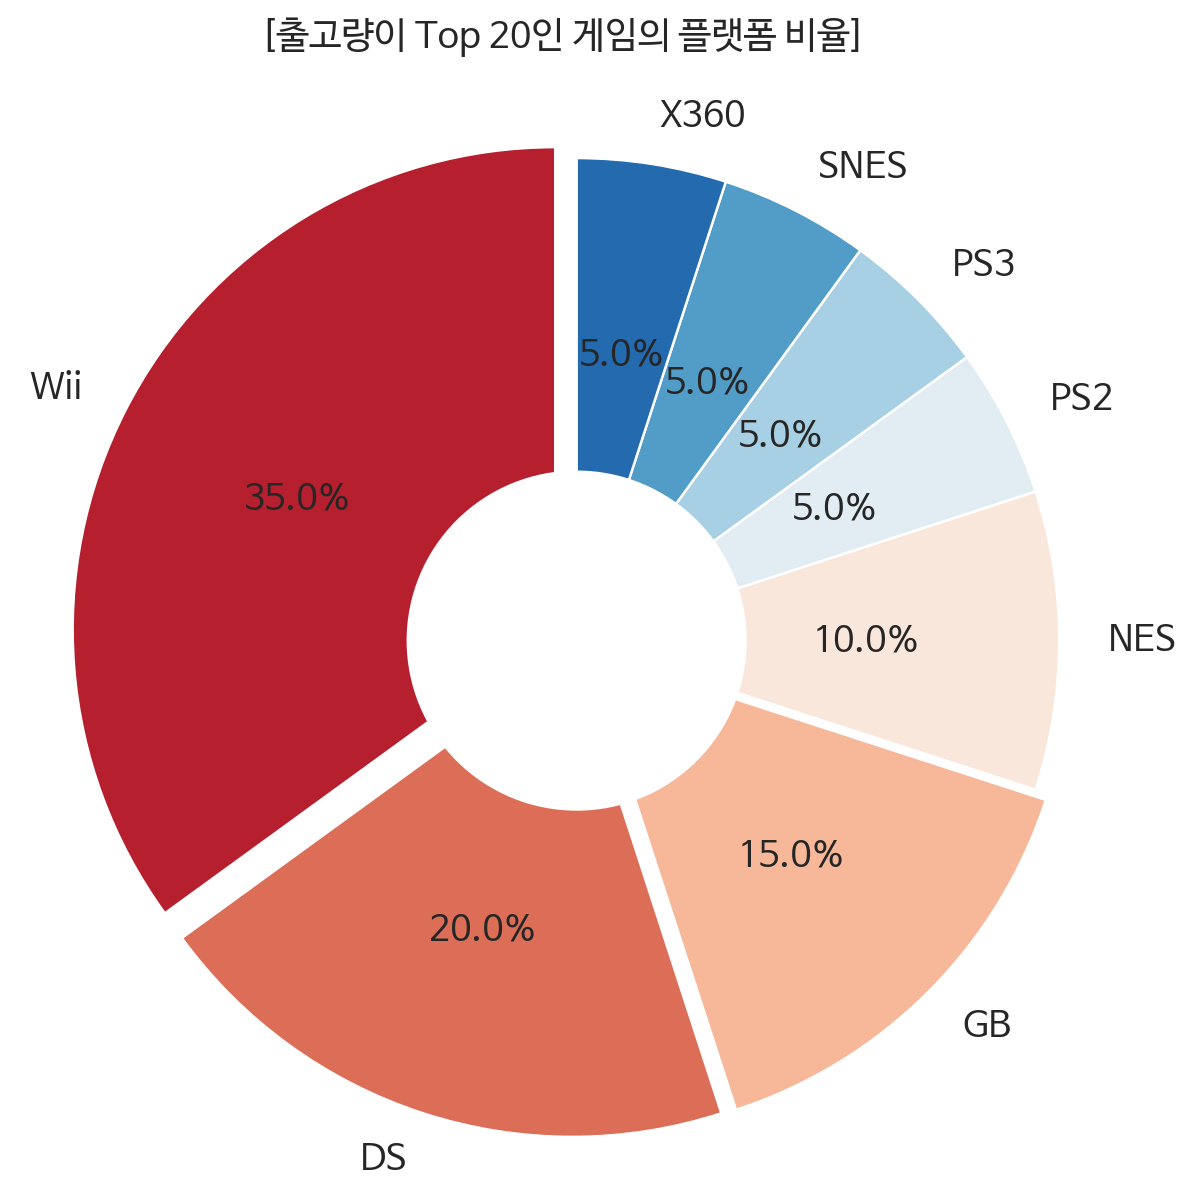

In [93]:
# 시각화
plt.figure(figsize=(8,8), dpi=88)

explode = [0.05, 0.03, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0]

plt.pie(top_platform['Count'].values,
        labels=top_platform['Platform'],
        autopct='%.1f%%', # 표시될 숫자 형식: 소수점 한자리까지
        startangle=90,
        textprops={'fontsize':15},
        colors=sns.color_palette("RdBu", 8),
        explode=explode)

center_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.title('[출고량이 Top 20인 게임의 플랫폼 비율]', fontsize=15, y=1.05, loc='center')

plt.savefig('출고량이 Top 20인 게임의 플랫폼 비율.png')

plt.show()

출고량 Top 20에서 플랫폼이 Wii인 게임들이 가장 높은 비율을 차지하고 있으므로, <br>
플랫폼이 Wii인 게임에 대한 분석을 진행한다. 

##### 5) Wii 플랫폼 게임 분석 

In [94]:
# 'Platform'이 Wii인 게임 추출 
wii_game = df[df['Platform'] == 'Wii']
wii_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
35,G-Force,Wii,2009,Action,Disney Interactive Studios,0.19,0.20,0.00,0.05,0.44
38,Ninja Reflex,Wii,2008,Action,Electronic Arts,0.11,0.01,0.00,0.01,0.13
51,Chaotic: Shadow Warriors,Wii,2009,Action,Activision,0.18,0.00,0.00,0.01,0.19
55,SpongeBob's Boating Bash,Wii,2010,Misc,THQ,0.25,0.07,0.00,0.03,0.35
...,...,...,...,...,...,...,...,...,...,...
16515,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
16545,Boom Blox,Wii,2008,Puzzle,Electronic Arts,0.72,0.38,0.00,0.12,1.22
16563,Wall-E,Wii,2008,Platform,THQ,0.51,0.40,0.00,0.11,1.02


In [95]:
# Wii 플랫폼 게임의 연도별 출시량 
wii_year = wii_game.groupby(['Year']).size().reset_index(name='Count')
wii_year

,Year,Count
0,2006,44
1,2007,184
2,2008,281
3,2009,325
4,2010,253
5,2011,143
6,2012,32
7,2013,12
8,2014,6
9,2015,4


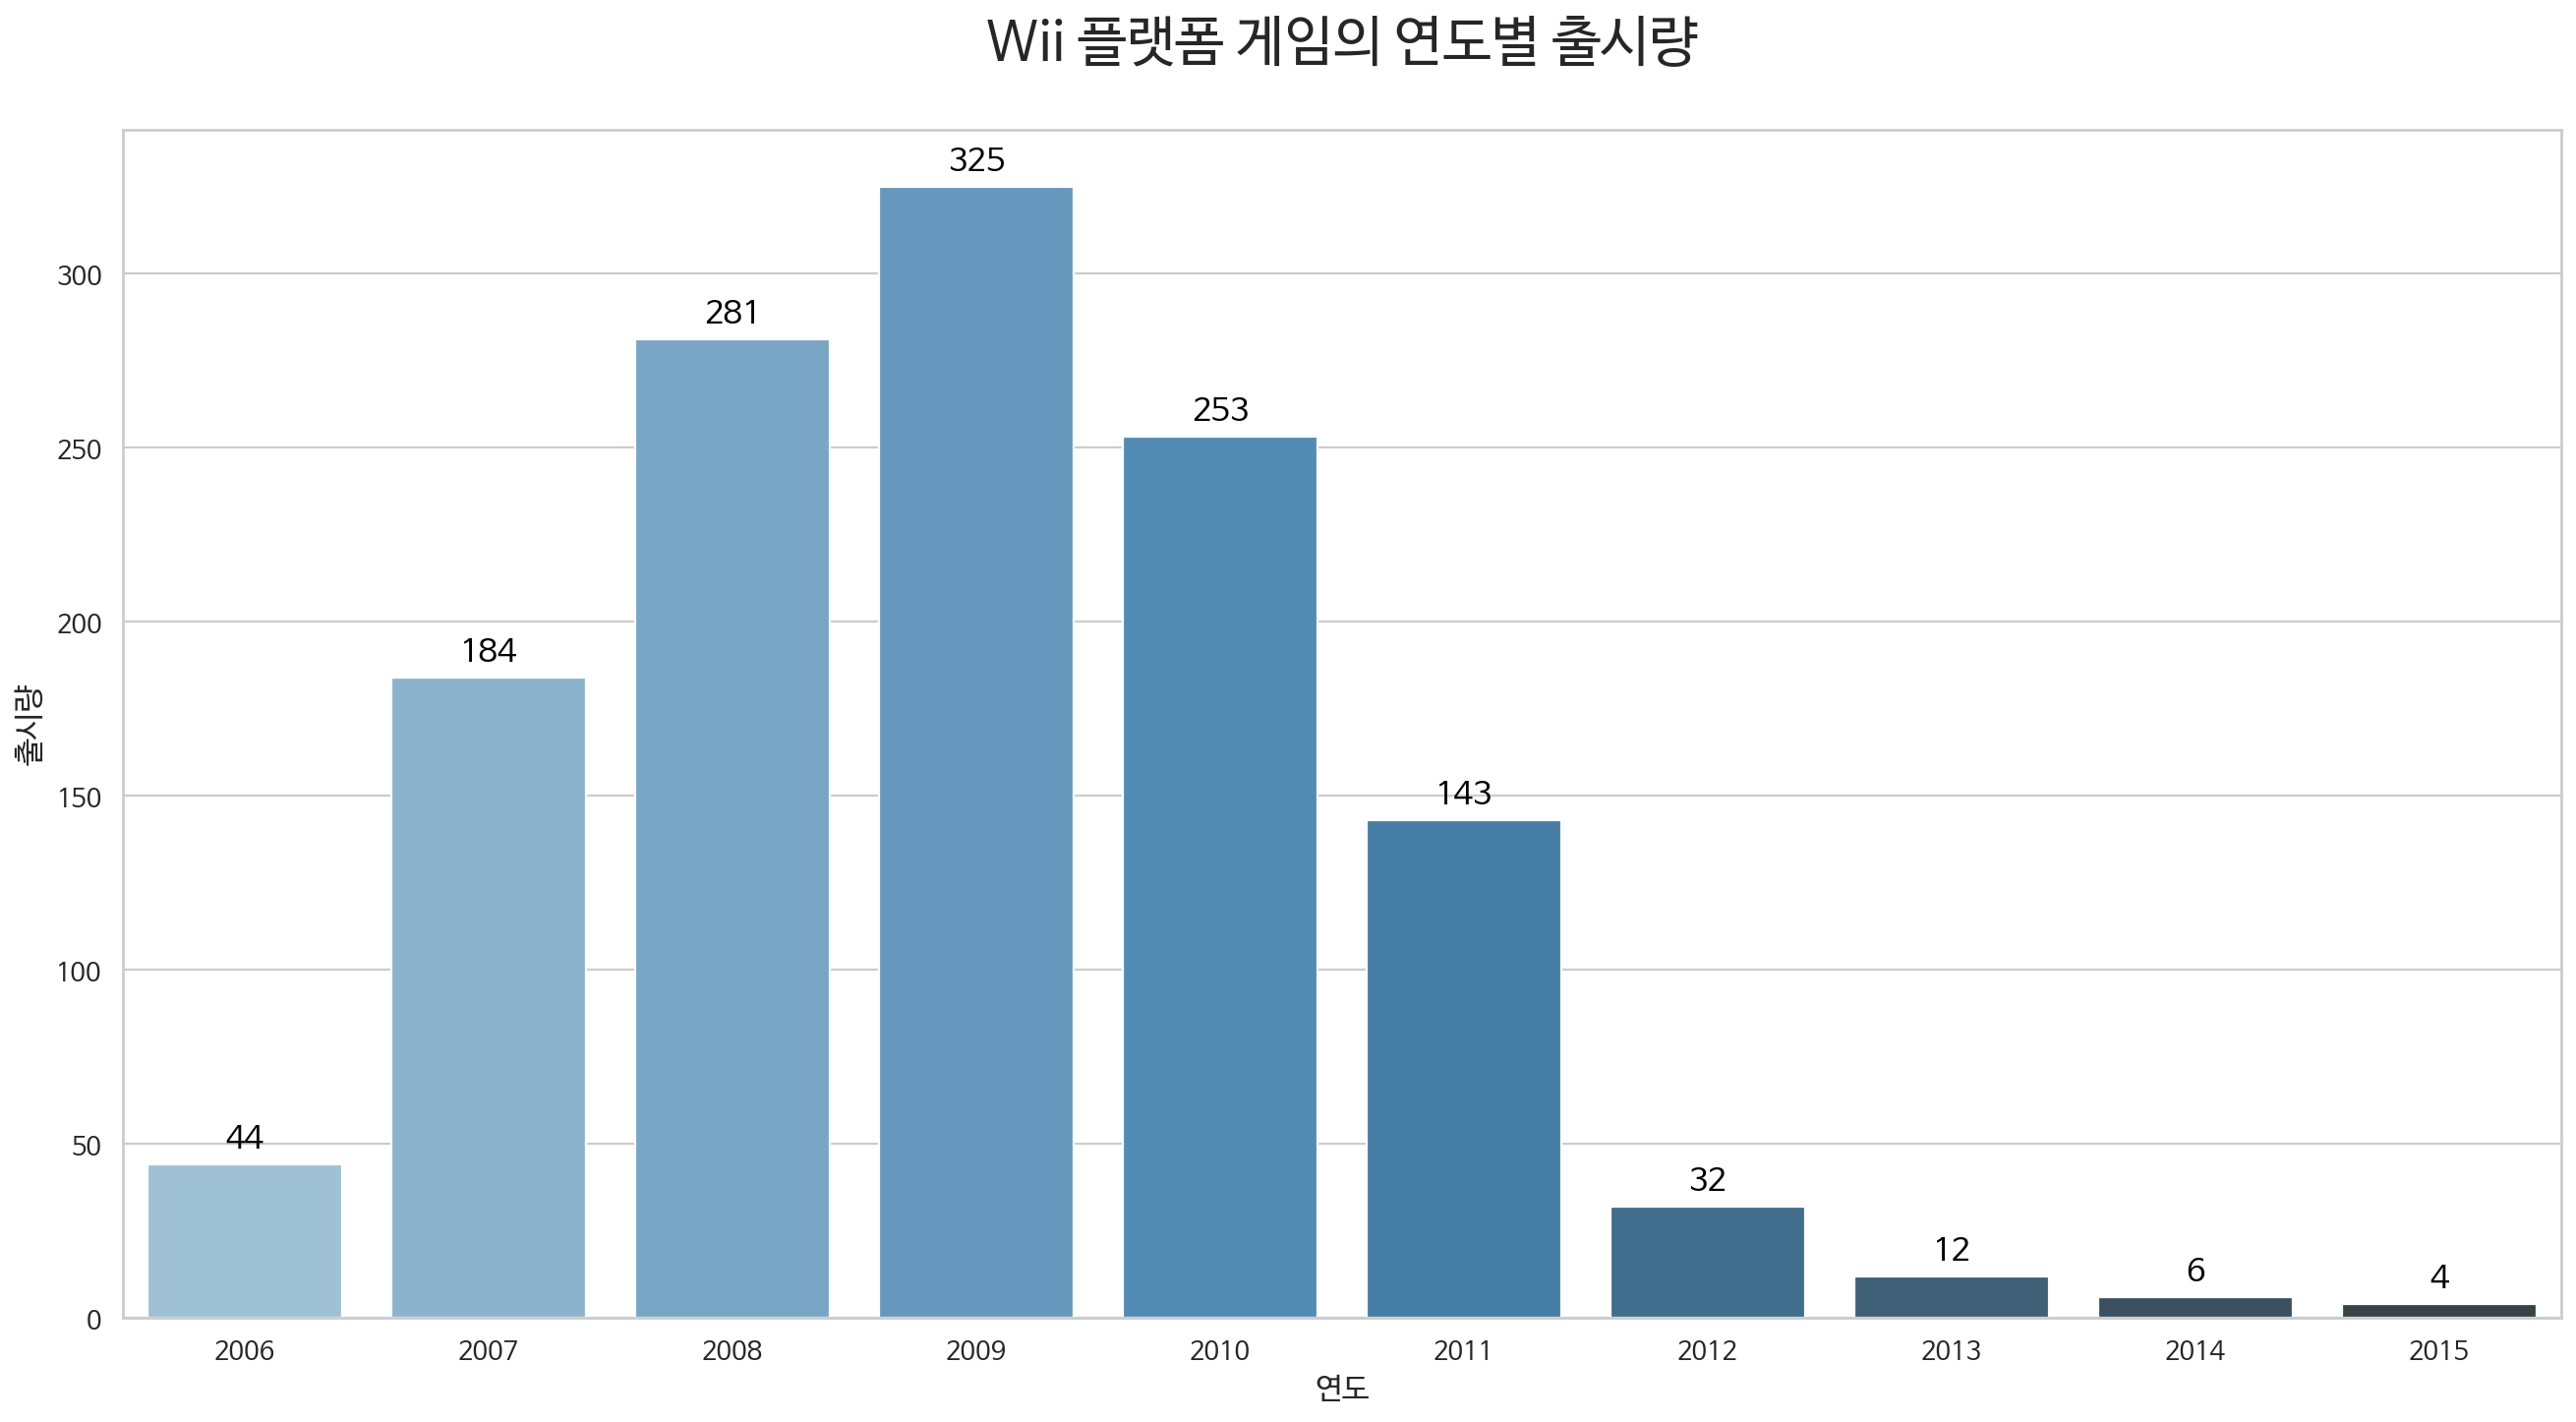

In [96]:
# 시각화
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(20,10), dpi=80)
ax = sns.barplot(x='Year', y='Count', data=wii_year, palette="Blues_d")

idx = 0
for value in wii_year['Count']:
    ax.text(x=idx, y=value + 5, s=str(value),
            color='black', size=15, rotation=0, ha='center')
    idx += 1
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('연도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('Wii 플랫폼 게임의 연도별 출시량', fontsize=25, y=1.05, loc='center')

plt.savefig('Wii 플랫폼 게임의 연도별 출시량.png')

plt.show()

In [97]:
# Wii 플랫폼 게임의 연도별 출고량 
wii_year_sales = wii_game.groupby(['Year'])['Global_Sales'].sum().reset_index()
wii_year_sales

,Year,Global_Sales
0,2006,137.85
1,2007,154.60
2,2008,173.98
3,2009,210.26
4,2010,123.29
5,2011,62.02
6,2012,22.78
7,2013,9.38
8,2014,4.43
9,2015,1.56


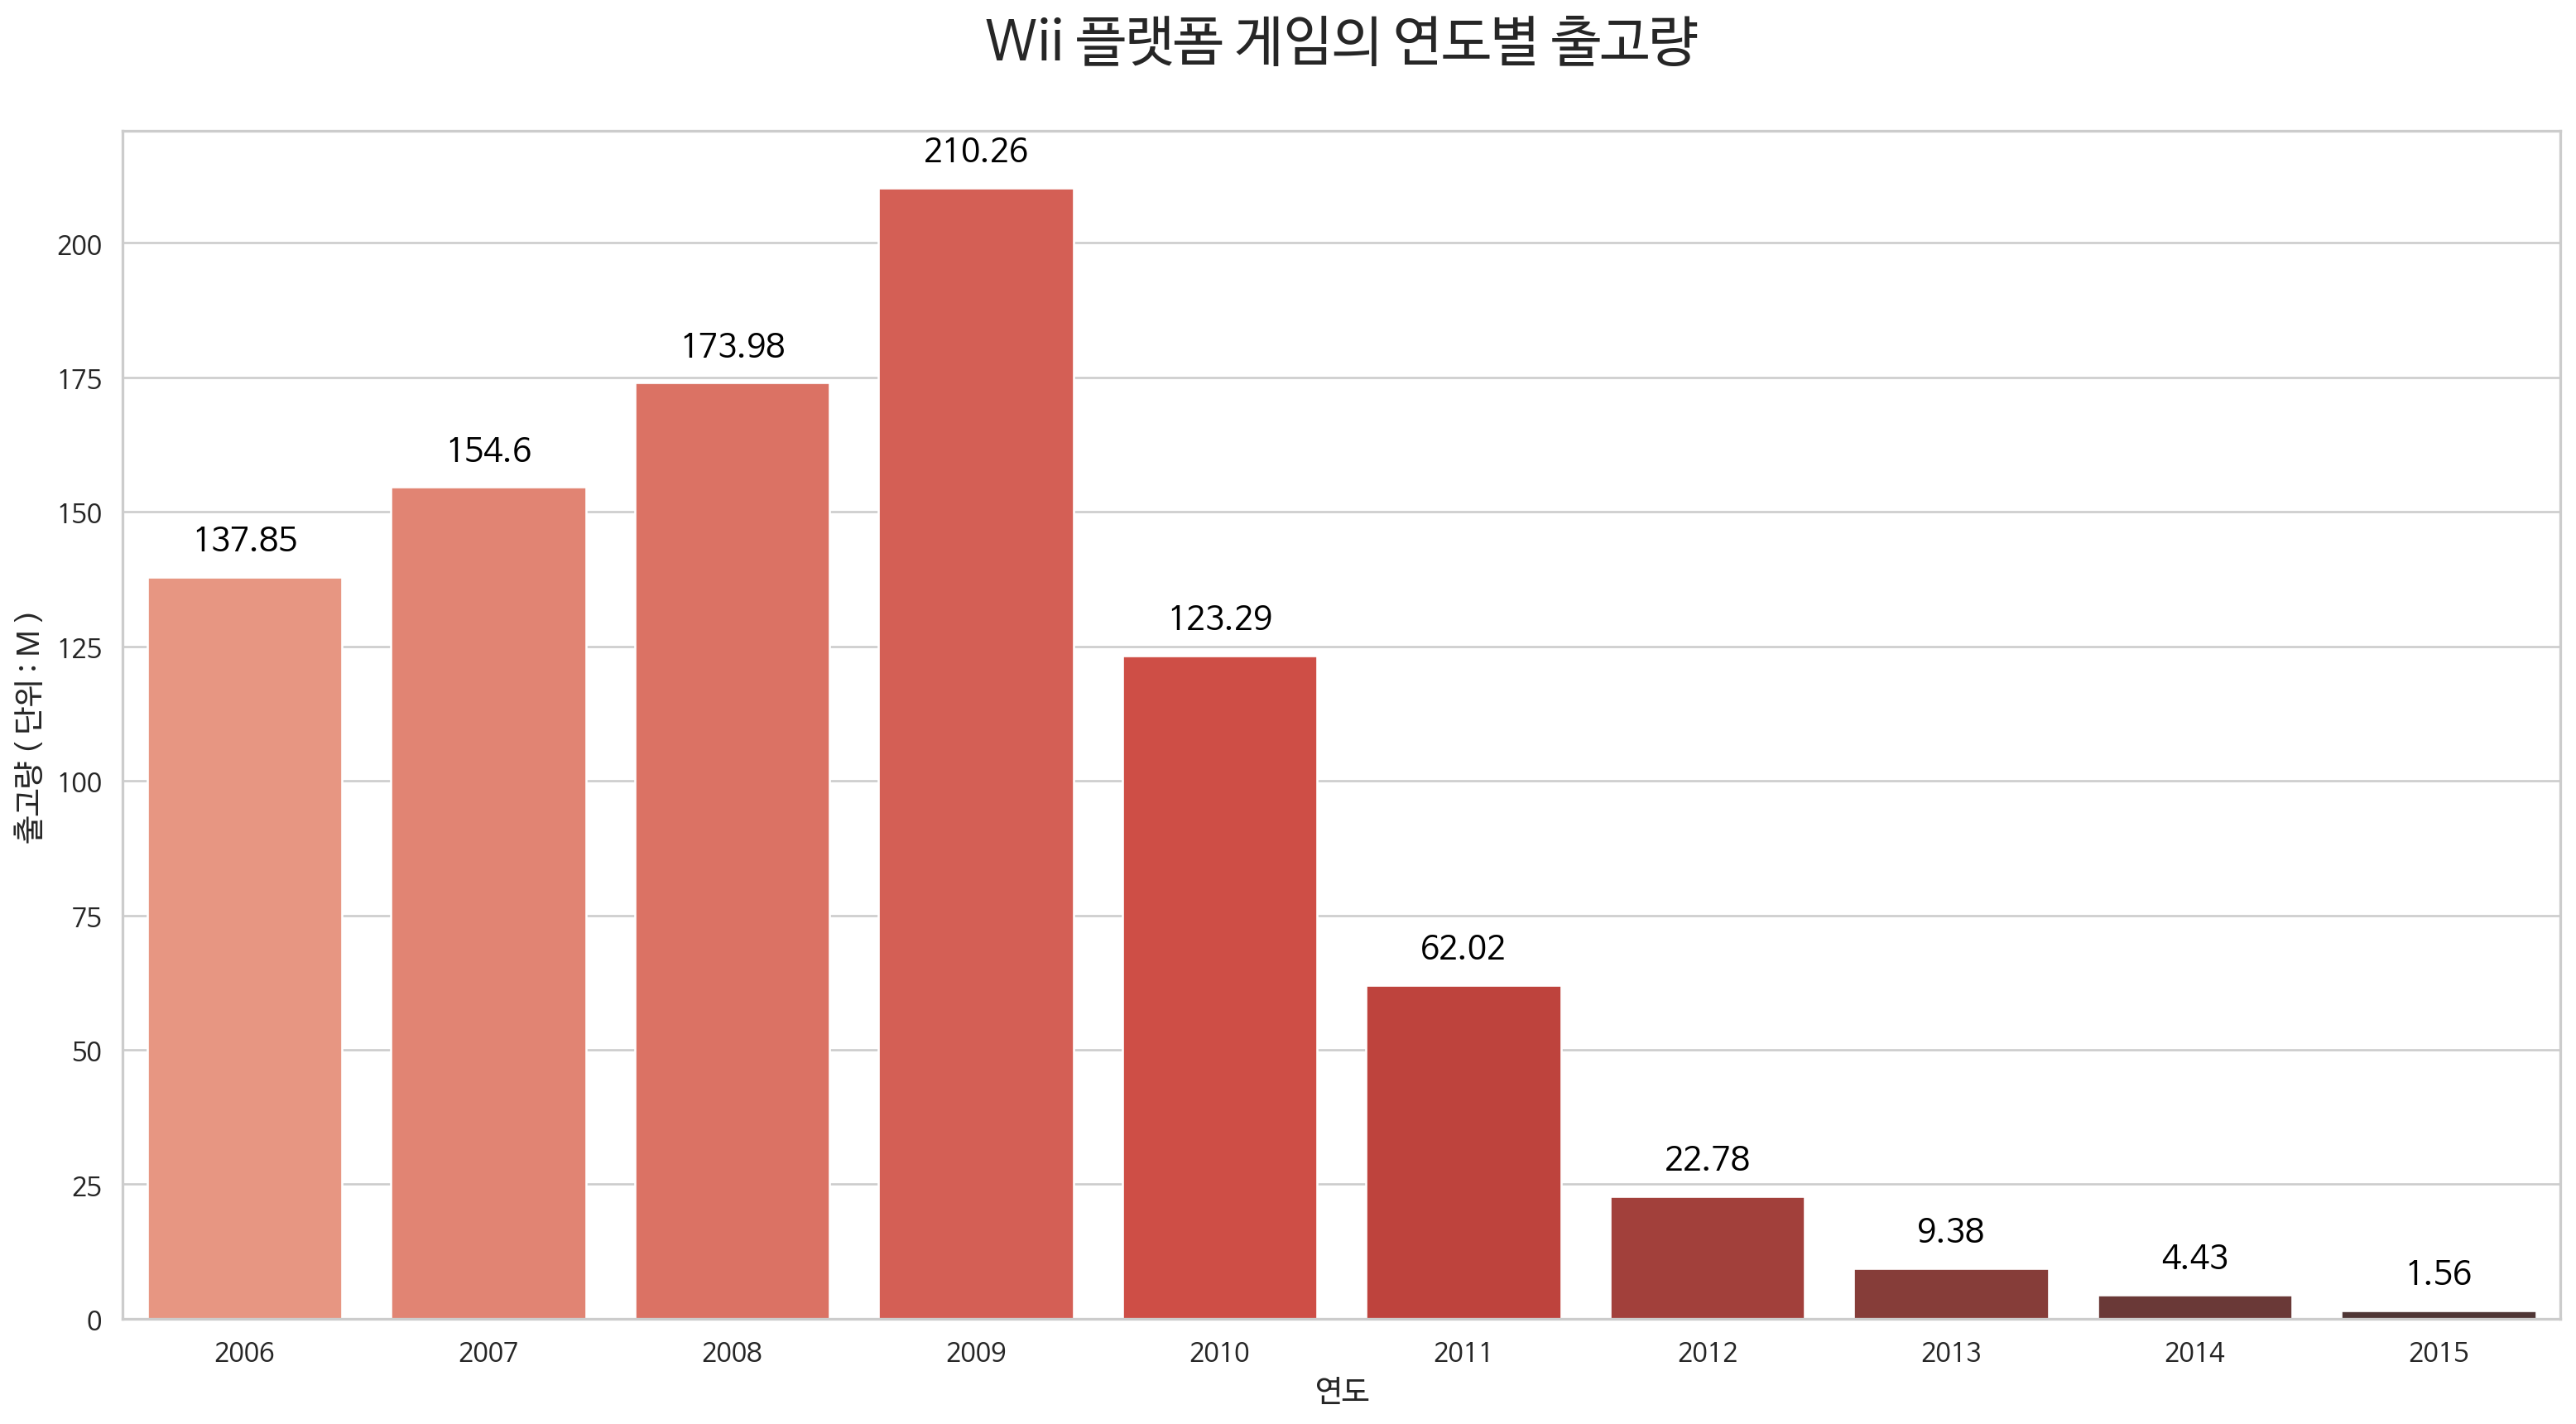

In [99]:
# 시각화
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(20,10), dpi=95)
ax = sns.barplot(x='Year', y='Global_Sales', data=wii_year_sales, palette="Reds_d")

idx = 0
for value in wii_year_sales['Global_Sales']:
    ax.text(x=idx, y=value + 5, s=str(round(value, 2)),
            color='black', size=15, rotation=0, ha='center')
    idx += 1
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('연도', fontsize=14)
plt.ylabel('출고량 ( 단위 : M )', fontsize=14)
ax.set_title('Wii 플랫폼 게임의 연도별 출고량', fontsize=25, y=1.05, loc='center')

plt.savefig('Wii 플랫폼 게임의 연도별 출고량.png')

plt.show()

In [100]:
# Wii 플랫폼 게임의 연도별 출시량과 출고량 비교

# Wii 플랫폼 게임의 연도별 출시량 높은 순서
wii_year_sorted = wii_year.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
wii_year_sorted = pd.DataFrame(wii_year_sorted)
wii_year_sorted = wii_year_sorted.rename(columns={'Year':'출시량'})
wii_year_sorted

# Wii 플랫폼 게임의 연도별 출고량 높은 순서
wii_year_sales_sorted = wii_year_sales.sort_values(by=['Global_Sales'], ascending=False).reset_index(drop=True)
wii_year_sales_sorted = pd.DataFrame(wii_year_sales_sorted)
wii_year_sales_sorted = wii_year_sales_sorted.rename(columns={'Year':'출고량'})
wii_year_sales_sorted

# Wii 플랫폼 게임의 연도별 출시량과 출고량 비교 데이터 생성
Wii_compare = pd.concat([wii_year_sorted['출시량'], wii_year_sales_sorted['출고량']], axis=1)
Wii_compare 

,출시량,출고량
0,2009,2009
1,2008,2008
2,2010,2007
3,2007,2006
4,2011,2010
5,2006,2011
6,2012,2012
7,2013,2013
8,2014,2014
9,2015,2015


Wii 플랫폼 게임의 연도별 출시량과 출고량을 비교해보았을 때, <br> 
2006년, 2007년, 2010년, 2011년에서 차이가 존재했다. 

2006년과 2007년에는 출시량이 적었던 것에 비해 출고량은 많았고, <br>
2010년과 2011년에는 출시량은 많았지만 그에 비해 출고량은 적었다.  

##### 6) 출고량이 Top 20인 게임의 지역별 분석

In [101]:
# 출고량이 Top 20인 게임의 지역별 출고량 데이터 추출
top_20_df = df.sort_values(by=['Global_Sales'], ascending=False).head(20)
top_20_local = top_20_df[['Name',	'NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales']]
top_20_local
# 'Rank' column 생성 및 인덱스로 설정
rank = [str(x)+' 위' for x in range(1, 21)]
top_20_local['Rank'] = rank
top_20_local  = top_20_local.set_index('Rank')
top_20_local 

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,
1 위,Wii Sports,41.49,29.02,3.77,8.46
2 위,Super Mario Bros.,29.08,3.58,6.81,0.77
3 위,Mario Kart Wii,15.85,12.88,3.79,3.31
4 위,Wii Sports Resort,15.75,11.01,3.28,2.96
5 위,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
6 위,Tetris,23.20,2.26,4.22,0.58
7 위,New Super Mario Bros.,11.38,9.23,6.50,2.90
8 위,Wii Play,14.03,9.20,2.93,2.85
9 위,New Super Mario Bros. Wii,14.59,7.06,4.70,2.26


In [102]:
# tidy 형태로 만들기
top_local_tidy = pd.melt(top_20_local, id_vars=['Name'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                      var_name='Local', value_name='Sales')
top_local_tidy.head(21)

,Name,Local,Sales
0,Wii Sports,NA_Sales,41.49
1,Super Mario Bros.,NA_Sales,29.08
2,Mario Kart Wii,NA_Sales,15.85
3,Wii Sports Resort,NA_Sales,15.75
4,Pokemon Red/Pokemon Blue,NA_Sales,11.27
5,Tetris,NA_Sales,23.20
6,New Super Mario Bros.,NA_Sales,11.38
7,Wii Play,NA_Sales,14.03
8,New Super Mario Bros. Wii,NA_Sales,14.59
9,Duck Hunt,NA_Sales,26.93


In [103]:
# Top 20 게임의 지역별 출고량 
top_local = top_local_tidy.groupby(['Local']).sum()
top_local = top_local.reset_index()
top_local = top_local.sort_values(by=['Sales'], ascending=False).reset_index(drop=True)
top_local  

,Local,Sales
0,NA_Sales,298.42
1,EU_Sales,162.75
2,JP_Sales,75.21
3,Other_Sales,53.86


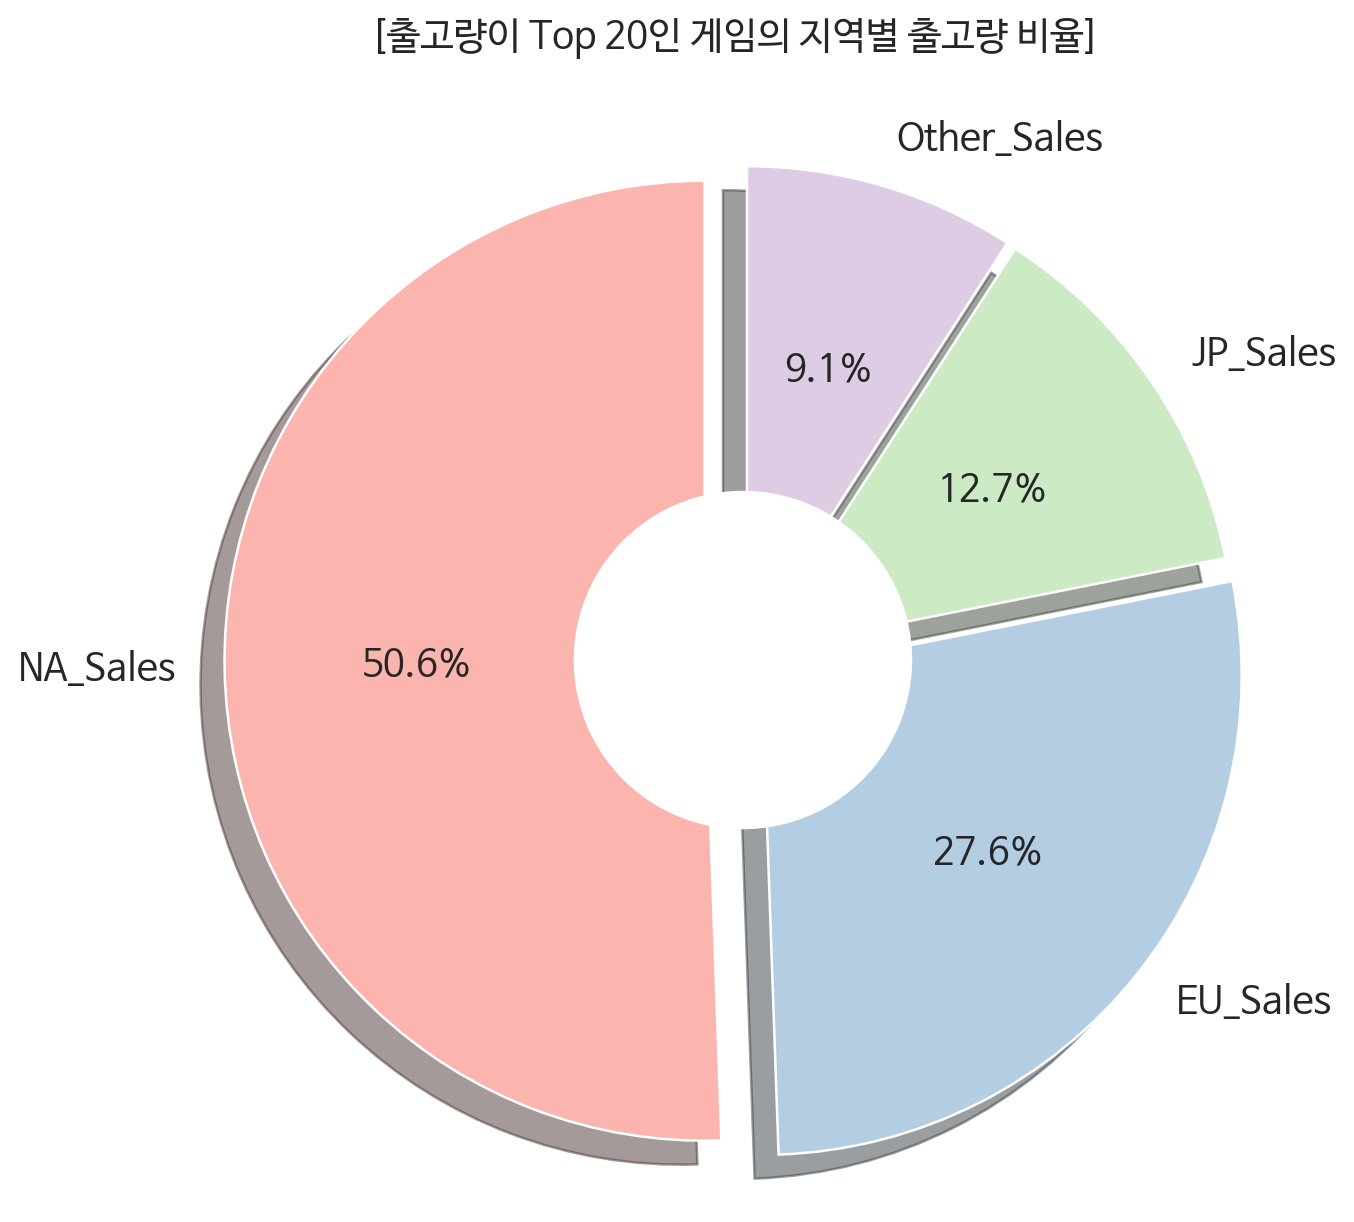

In [104]:
# 시각화
plt.figure(figsize=(8,8), dpi=90)

explode = [0.08, 0.05, 0.03, 0.03]

plt.pie(top_local['Sales'].values,
        labels=top_local['Local'],
        autopct='%.1f%%', # 표시될 숫자 형식: 소수점 한자리까지
        startangle=90,
        textprops={'fontsize':15},
        colors=sns.color_palette("Pastel1", 4),
        shadow=True, 
        explode=explode)

center_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.title('[출고량이 Top 20인 게임의 지역별 출고량 비율]', fontsize=15, y=1.05, loc='center')

plt.savefig('출고량이 Top 20인 게임의 지역별 출고량 비율.png')

plt.show()

출고량이 Top 20인 게임의 지역별 출고량에 대해 분석해본 결과, <br>
**북미 지역**이 절반 이상을 차지하는 것으로 나타났다. 

##### 7) 최근 5년간 출고량이 Top 20인 게임 분석

In [105]:
# 최근 5년간 출고량이 높은 게임 20개 추출 
recent_top_20 = df[df['Year'] >= 2014].sort_values(by=['Global_Sales'], ascending=False).head(20)
recent_top_20 = recent_top_20[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Global_Sales']]
recent_top_20 = recent_top_20.sort_values(by=['Global_Sales'], ascending=False)
# 'Rank' column 생성 및 인덱스로 설정
rank = [str(x)+' 위' for x in range(1, 21)]
recent_top_20['Rank'] = rank
recent_top_20 = recent_top_20.set_index('Rank') 
recent_top_20

,Name,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,,
1 위,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14.24
2 위,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,11.99
3 위,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,11.33
4 위,FIFA 16,PS4,2015,Sports,Electronic Arts,8.49
5 위,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,7.67
6 위,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,7.61
7 위,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,7.44
8 위,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,7.29
9 위,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,6.96


In [106]:
# 최근 5년간 Top 20 게임의 장르별 개수
recent_top_genre = recent_top_20.groupby(['Genre']).size().reset_index(name='Count')
recent_top_genre = recent_top_genre.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
recent_top_genre 

,Genre,Count
0,Shooter,7
1,Sports,4
2,Action,3
3,Fighting,2
4,Role-Playing,2
5,Misc,1
6,Racing,1


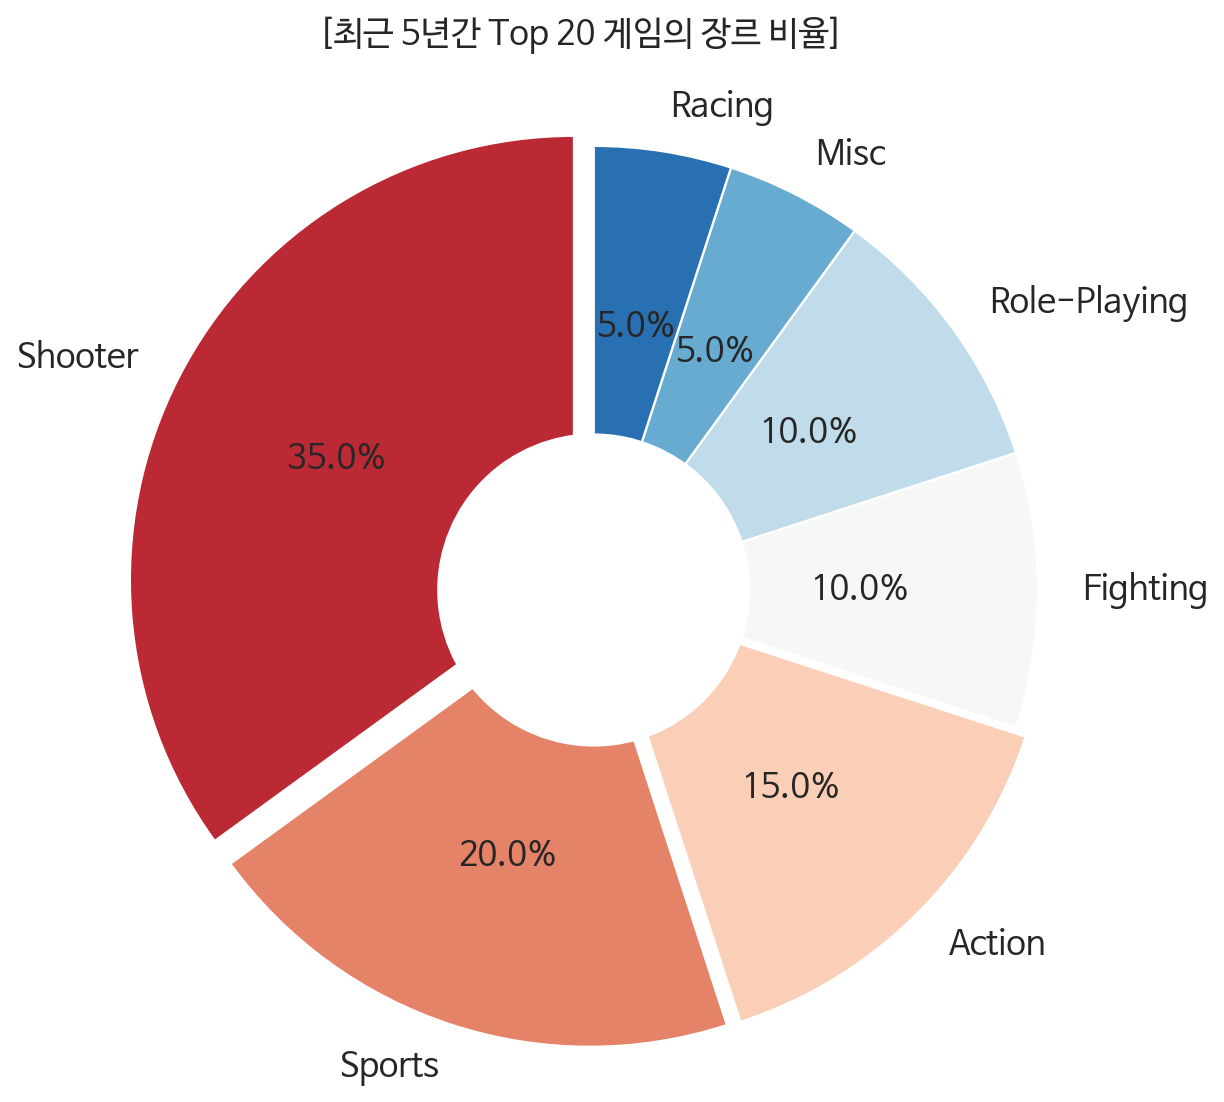

In [107]:
# 시각화
plt.figure(figsize=(8,8), dpi=81)

explode = [0.05, 0.03, 0.03, 0.0, 0.0, 0.0, 0.0]

plt.pie(recent_top_genre['Count'].values,
        labels=recent_top_genre['Genre'],
        autopct='%.1f%%', # 표시될 숫자 형식: 소수점 한자리까지
        startangle=90,
        textprops={'fontsize':15},
        colors=sns.color_palette("RdBu", 7),
        explode=explode)

center_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.title('[최근 5년간 Top 20 게임의 장르 비율]', fontsize=15, y=1.05, loc='center')

plt.savefig('최근 5년간 Top 20 게임의 장르 비율.png')

plt.show()

최근 5년간 (데이터셋 기준으로 2014~2017년, 그리고 2020년)  출고량 Top 20 게임의 장르를 분석해본 결과, <br>
1위는 Shooter, Sports가 2위, 그리고 Action이 3위인 것으로 나타났다. 

In [108]:
# 최근 5년간 Top 20 게임의 플랫폼별 개수 
recent_top_platform = recent_top_20.groupby(['Platform']).size().reset_index(name='Count')
recent_top_platform = recent_top_platform.sort_values(by=['Count'], ascending=False).reset_index(drop=True)
recent_top_platform

,Platform,Count
0,PS4,10
1,WiiU,3
2,XOne,3
3,3DS,2
4,PS3,2


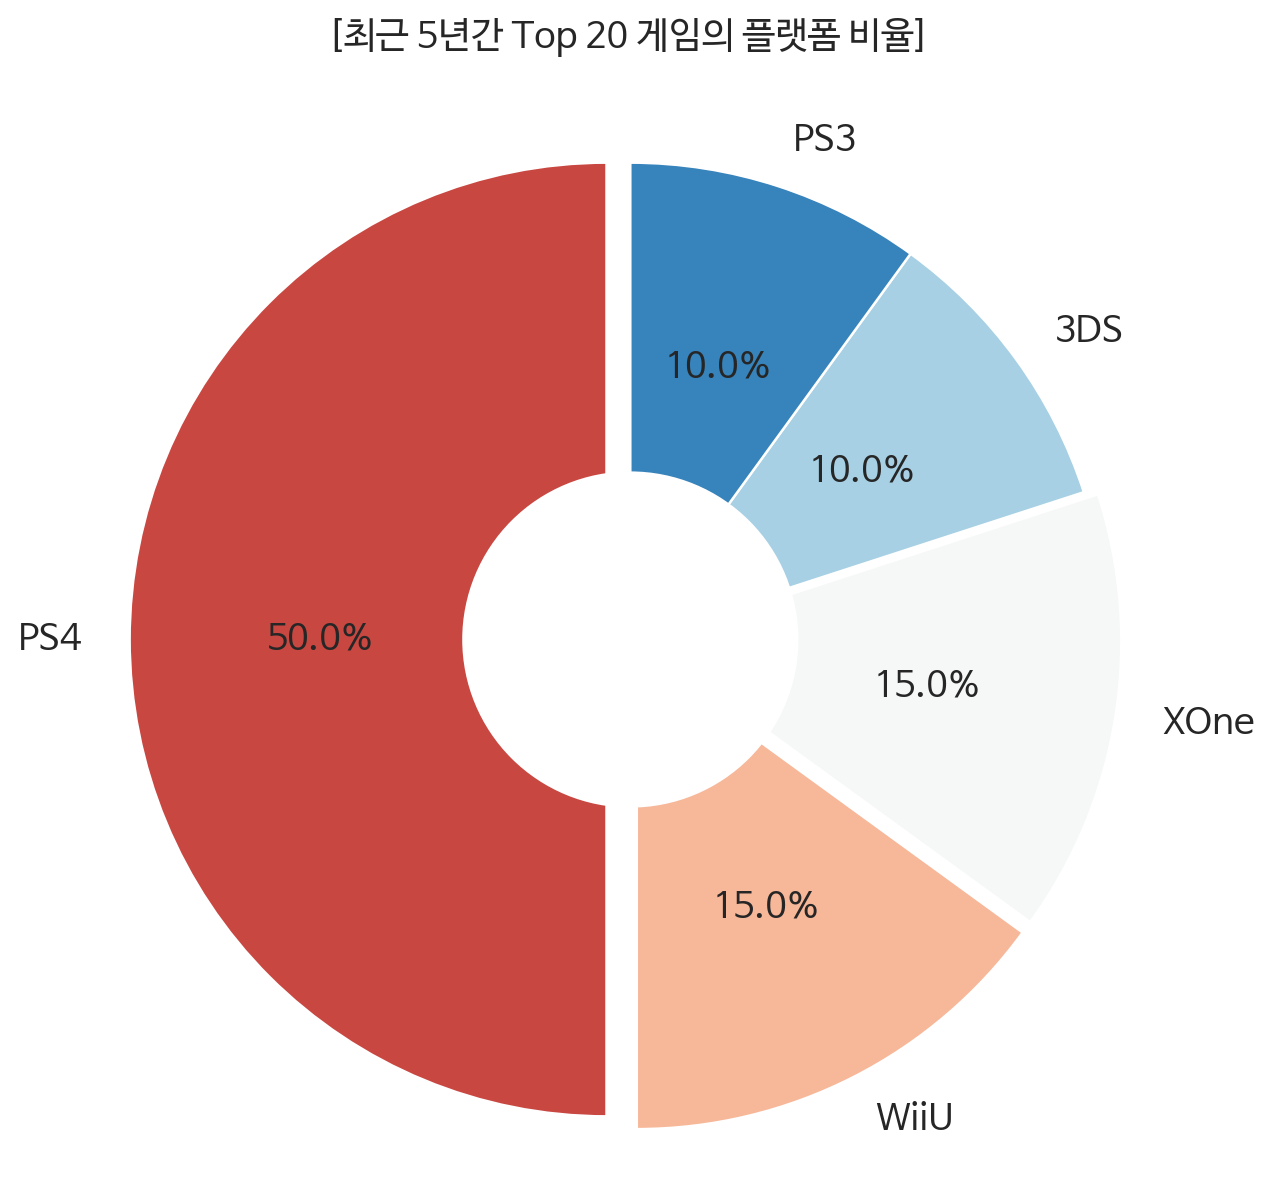

In [109]:
# 시각화
plt.figure(figsize=(8,8), dpi=88)

explode = [0.05, 0.03, 0.03, 0.0, 0.0]

plt.pie(recent_top_platform['Count'].values,
        labels=recent_top_platform['Platform'],
        autopct='%.1f%%', # 표시될 숫자 형식: 소수점 한자리까지
        startangle=90,
        textprops={'fontsize':15},
        colors=sns.color_palette("RdBu", 5),
        explode=explode)

center_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.title('[최근 5년간 Top 20 게임의 플랫폼 비율]', fontsize=15, y=1.05, loc='center')

plt.savefig('최근 5년간 Top 20 게임의 플랫폼 비율.png')

plt.show()

최근 5년간 출고량 Top 20 게임의 플랫폼을 분석해본 결과, <br>
PS4가 1위, WiiU가 2위, 그리고 XOne이 3위인 것으로 나타났다. 

## Part 3 - 결론 및 시사점

### 다음 분기에 어떤 게임을 설계해야 할까 

#### 타깃 지역: **북미** 지역


#### 장르: **Shooter**


#### 플랫폼: **PS**

출고량이 Top 20인 게임의 지역별 출고량의 절반 이상을 차지한 **북미 지역을 타깃으로**, <br>
최근 5년간 출고량 Top 20인 게임의 장르에서 1위를 기록한 **Shooter 장르의 게임을** <br>
플레이스테이션 출시 이후 연도별 최고 출고량을 기록한 플랫폼과 최근 5년간 출고량 Top 20인 게임의 플랫폼에서 1위를 기록한 <br> **플레이스테이션을 플랫폼으로 한 게임을 설계**한다. 